**Eric Meinhardt / emeinhardt@ucsd.edu**

In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#glypy-basics" data-toc-modified-id="glypy-basics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>glypy</code> basics</a></span><ul class="toc-item"><li><span><a href="#Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code" data-toc-modified-id="Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a specific glycan, show it as a tree and in linear code</a></span></li><li><span><a href="#List-of-linear-code-expressions" data-toc-modified-id="List-of-linear-code-expressions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>List of linear code expressions</a></span></li><li><span><a href="#Declare-some-syntactic-categories" data-toc-modified-id="Declare-some-syntactic-categories-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Declare some syntactic categories</a></span></li></ul></li><li><span><a href="#Bottom-up-parsing" data-toc-modified-id="Bottom-up-parsing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottom-up parsing</a></span><ul class="toc-item"><li><span><a href="#Parenthesis-checking" data-toc-modified-id="Parenthesis-checking-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parenthesis checking</a></span></li><li><span><a href="#String-manipulation-boilerplate" data-toc-modified-id="String-manipulation-boilerplate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>String manipulation boilerplate</a></span><ul class="toc-item"><li><span><a href="#Generating-contiguous-subsequences" data-toc-modified-id="Generating-contiguous-subsequences-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Generating contiguous subsequences</a></span></li><li><span><a href="#Generating-prefixes-and-suffixes" data-toc-modified-id="Generating-prefixes-and-suffixes-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Generating prefixes and suffixes</a></span></li><li><span><a href="#Deprefixing-and-desuffixing" data-toc-modified-id="Deprefixing-and-desuffixing-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Deprefixing and desuffixing</a></span></li><li><span><a href="#Circumfixing" data-toc-modified-id="Circumfixing-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Circumfixing</a></span></li><li><span><a href="#Decircumfixing" data-toc-modified-id="Decircumfixing-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Decircumfixing</a></span></li><li><span><a href="#Infixing" data-toc-modified-id="Infixing-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Infixing</a></span></li><li><span><a href="#Deinfixing" data-toc-modified-id="Deinfixing-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Deinfixing</a></span></li></ul></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Conversion-to-json/s-expressions" data-toc-modified-id="Conversion-to-json/s-expressions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conversion to json/s-expressions</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-ligand-&quot;...&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-ligand-&quot;...&quot;-uncertainty-operator-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>ligand</code> "..." uncertainty operator</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-continuation-&quot;_&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-continuation-&quot;_&quot;-uncertainty-operator-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>continuation</code> "_" uncertainty operator</a></span></li><li><span><a href="#Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't" data-toc-modified-id="Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Identifying what continuation wildcards can capture that ligand wildcards can't</a></span><ul class="toc-item"><li><span><a href="#Continuation-matches-are-a-superset-of-ligand-matches" data-toc-modified-id="Continuation-matches-are-a-superset-of-ligand-matches-4.7.1"><span class="toc-item-num">4.7.1&nbsp;&nbsp;</span>Continuation matches are a superset of ligand matches</a></span></li><li><span><a href="#What's-unique-to-continuation-matches?" data-toc-modified-id="What's-unique-to-continuation-matches?-4.7.2"><span class="toc-item-num">4.7.2&nbsp;&nbsp;</span>What's unique to continuation matches?</a></span></li></ul></li><li><span><a href="#Krambeck-et-al.-2009's-possible-branch-point-&quot;-|-&quot;-uncertainty-operator" data-toc-modified-id="Krambeck-et-al.-2009's-possible-branch-point-&quot;-|-&quot;-uncertainty-operator-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>possible branch point</code> " | " uncertainty operator</a></span></li></ul></li></ul></div>

# Motivation

**Purpose:** This is software-as-'tool for thinking' aimed at illuminating the not-always-clear or elaborated meaning of linear code's uncertainty operators. In particular, Krambeck et al. (2009)'s "_", "...", and " | " are the three examined here.

**Plan:** To accomplish this, the notebook builds on `glypy`. While `glypy` does not support linear code uncertainty operators, it does let you move between different representations of *individual glycan (types)*. After defining rules for identifying subsequences within the linear code expression of a glycan that match an uncertainty operator, this notebook then generates all nonempty matches for the operator within the glycan linear code expression.

## Requirements

 - `glypy` (and therefore Python 2)
 - `funcy`
 - `matplotlib`

# Imports

In [2]:
from funcy import *

In [3]:
from itertools import product

In [4]:
from copy import deepcopy

In [5]:
from collections import OrderedDict

In [6]:
from json import dumps

In [7]:
def pprint(dictionary):
    print(dumps(dictionary, indent=2))

In [8]:
import glypy

In [9]:
from glypy.plot import plot
%matplotlib inline

In [10]:
import glypy.io.linear_code

# `glypy` basics

The code in this section illustrates some of the basic `glypy` operations used elsewhere, defines some convenient functions for translating between `glypy` objects and linear code, plotting associated trees, and picks out the set of monosaccharide abbreviations that `glypy` understands.

## Create a specific glycan, show it as a tree and in linear code

In [11]:
#much of the code snippets in this subsection are taken directly from 
# the glypy docs

In [12]:
monosaccharides = glypy.monosaccharides

In [13]:
glcnac1 = monosaccharides["GlcNAc"]
glcnac2 = monosaccharides["GlcNAc"]

glcnac1.add_monosaccharide(glcnac2, position=4)
bdman = monosaccharides["bdMan"]
glcnac2.add_monosaccharide(bdman, position=4)
adman1 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman1, position=3)
adman2 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman2, position=6)

n_linked_core = glypy.Glycan(root=glcnac1)
print(n_linked_core)

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dman-HEX-1:5

RES 1b:b-dman-HEX-1:5

RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:a-dman-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+-1)3d
3:3d(2+1)4n
4:3o(4+-1)5d
5:5o(3+-1)6d
6:5o(6+-1)7d



(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb7f882a90>)

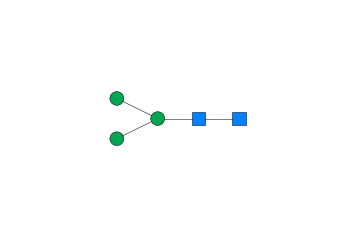

In [14]:
plot(n_linked_core)

In [15]:
glypy.io.linear_code.to_linear_code(n_linked_core)

'Ma6(Ma3)Mb4GNb4GNb'

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdb7f72c410>)

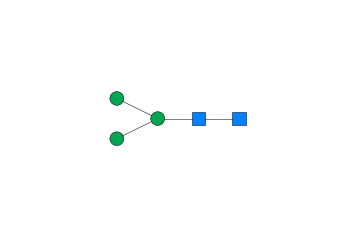

In [16]:
plot(glypy.io.linear_code.parse_linear_code('Ma6(Ma3)Mb4GNb4GNb'))

In [17]:
def gen(glycan):
    '''
    Abbreviation for 
      `glypy.io.linear_code.to_linear_code(glycan)`
    '''
    return glypy.io.linear_code.to_linear_code(glycan)

def parse(linear_code_expression):
    '''
    Abbreviation for 
      `glypy.io.linear_code.parse_linear_code(linear_code_expression)`
    '''
    return glypy.io.linear_code.parse_linear_code(linear_code_expression)

def parsePlot(linear_code_expression):
    '''
    Abbreviation for 
      `plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))`
    '''
    plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))

'GN?'

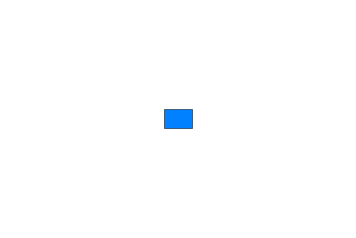

In [18]:
parsePlot('GN')
GN_parsed = parse('GN');
gen(GN_parsed)

In [19]:
GN_parsed

RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

'GNb'

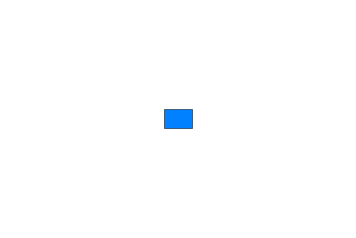

In [20]:
gen(monosaccharides["GlcNAc"])
parsePlot('GNb')

## List of linear code expressions

In [21]:
#Banin et al., 2002, Fig. 1
Bea2002Fig1 = ['GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa']

Bea2002B21 = ['Fa4GNb3Ab4Gb']
Bea2002B22 = ['GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb',
              'Ab3ANb4(NNa3)Ab4Gb',
              'Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb']
Bea2002B23 = ['{nGa6Ga4(-Ab3-)Ub2Ha3Ha3Ha3}'] #glypy chokes on this - see next cell
Bea2002B24 = ['GNb3Ab#4-Trifluoroacetamidophenol'] #glypy chokes on this - see next cell
Bea2002s = [Bea2002Fig1, Bea2002B21, Bea2002B22]#, Bea2002B23, Bea2002B24]
Banins = cat(Bea2002s)

In [22]:
for each in concat(Bea2002B23, Bea2002B24):
    try:
        parsePlot(each)
    except Exception as e:
        print(e)

Could not identify residue '...Ha3Ha3Ha3}' at 28
Could not identify residue '...midophenol' at 33


GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa
------
====
Fa4GNb3Ab4Gb
------
====
GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb
------
Ab3ANb4(NNa3)Ab4Gb
------
Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb
------
====


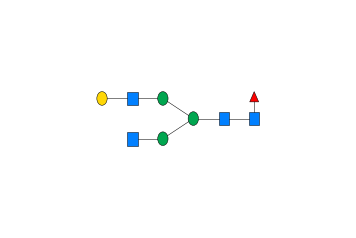

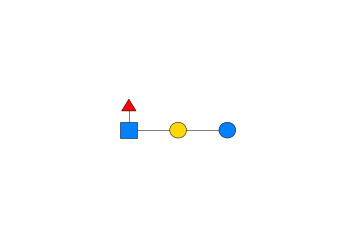

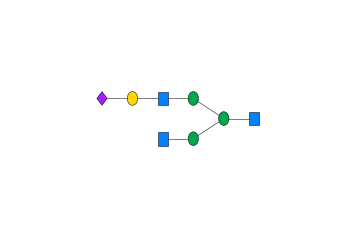

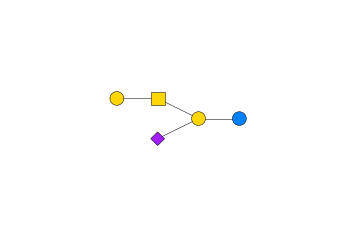

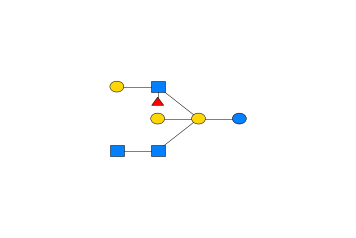

In [23]:
for eachBea in Bea2002s:
    for lce in eachBea:
        print(lce)
        parsePlot(lce)
        print('------')
    print('====')

In [24]:
#Krambeck et al. 2009, Fig. 1
Kea2009Fig1 = [
    'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig1

#Krambeck et al. 2009, Fig. 5
Kea2009Fig5 = [
    'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
    'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig5

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']

['GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']

In [25]:
LCEs = deepcopy(Kea2009Fig1) + deepcopy(Kea2009Fig5) + deepcopy(Banins)

Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------


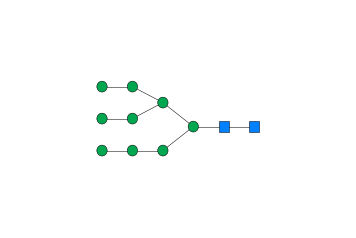

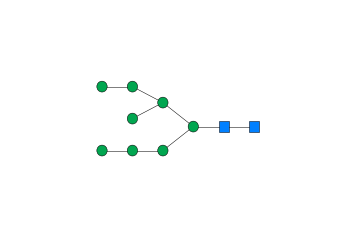

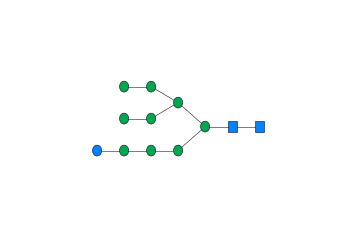

In [26]:
for lce in Kea2009Fig1:
    print(lce)
    parsePlot(lce)
    print('------')


GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
------
NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
------


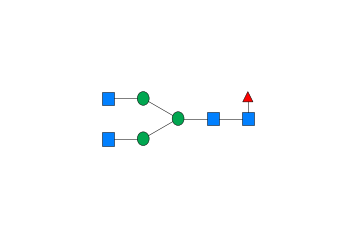

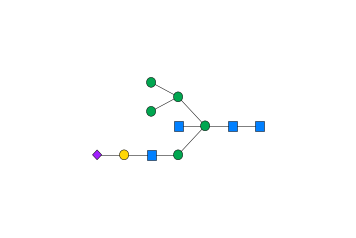

In [27]:
for lce in Kea2009Fig5:
    print(lce)
    parsePlot(lce)
    print('------')

In [28]:
# #Krambeck et al. 2017, Table 7, `'substrate' column
# ['(Ma2Ma',
# '(Ma3(Ma2Ma3(Ma6)Ma6)',
# '(Ma3(Ma6)Ma6',
# ]

Below is the glycan that will be used elsewhere in the notebook to illustrate the differences between different uncertainty operators.

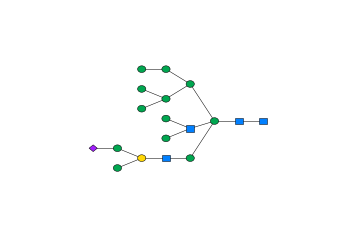

In [29]:
testTree = 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'
# testTree = 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

#ASIDE:
#One equivalent possible lisp-y notation (that can fit on one line if need be):
# (GN :b4 (GN :b4 (M :a3 (M :b2 (GN :b4 (A :a3 M
#                                          :a6 (M :a6 NN))))
#                    :b4 (GN :a3 M 
#                            :b4 M)
#                    :a6 (M :a3 (M :a3 M
#                                  :a6 M)
#                           :a6 (M :a3 M)))))
# What does this illustrate?
#   -> + of linear code: more compact than more general tree notations when 
#       chaining (unary branching) is more typical than (multi-child) branching.
#   -> - of linear code: the more MUs + the 'bushier' the glycan, the harder it 
#      is to see the gross hierarchical structure at a glance from linear code.
parsePlot(testTree)

In [30]:
testTree

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

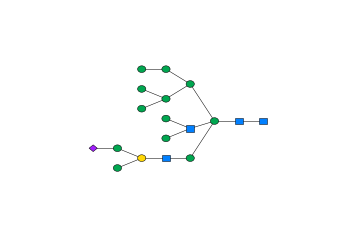

In [31]:
parsePlot(testTree)

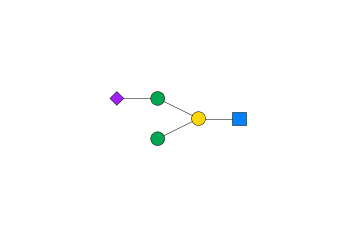

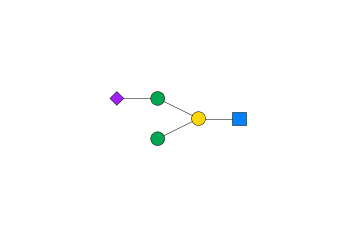

In [32]:
parsePlot('NNa6Ma6(Ma3)Ab4GNb')
parsePlot('Ma3(NNa6Ma6)Ab4GNb')

In [33]:
# A BNF grammar for (right-to-left=conventional) linear code in 
#  'leftward-ascending normal form',  i.e. the rightmost child of any node has 
#  the lowest bond index = as you move leftward among a node's children, the 
#  bond index increases and vice versa. (No uncertainty operators.)
# 
# (exp) non-leftmost-branch* stem <- exp
# SU-with-bond-info* SU_bare (bond_type)  <- stem
# SU_bare bond-type bond-location  <- SU-with-bond-info
# b | a <- bond-type
# 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 <- bond-location
# '(' exp ')' <- non-leftmost-branch


# A grammar for left-to-right linear code in 'rightward-ascending' normal form:
# 
# exp -> stem non-rightmost-branch* (exp) 
# stem -> (bond_type) SU_bare SU-with-bond-info*
# SU-with-bond-info -> SU_bare bond-type bond-location
# bond-type -> a | b
# bond-location -> 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
# non-rightmost-branch -> '(' exp ')'

## Declare some syntactic categories

In [34]:
parentheses = ('(',')')

In [35]:
print(list(monosaccharides))
len(list(monosaccharides))

['Hep', 'Ribose', 'NeuGc', 'Hex', 'bdGal', 'GlcN', 'Fru', '2-Amino-2-deoxyglucose', u'2-Keto-3-deoxynanonic acid', 'NeuAc2', 'Oct', 'Glucose', 'Psicose', 'Non', 'Psi', 'Allose', 'Neu5Ac', 'GlcNAc', 'MurNAc', 'Gal', 'Neu5Gc', 'Quinovose', 'ManAnhydro', 'Fucose', 'Tri', u'Neuraminic acid', 'Fructose', 'Ery', 'Gul', 'Rha', 'GalNac', 'Bac', 'Glucosamine', u'Muramic Acid', 'Dec', 'Tyv', 'Tyvelose', 'Kdn', 'Kdo', 'Oli', 'Sorbose', 'bdMan', 'Lyx', 'Rhamnose', 'Ara', 'Tag', 'Fructofuranose', u'Glucuronic Acid', 'Tal', 'Rib', 'Threose', 'Sug', 'Erythrose', 'GlcNA', 'Mur', 'Tet', 'Pen', 'Talose', 'Neu', 'Altose', 'Olivose', u'Neu5,9Ac2', 'MurNGc', 'Fuc', 'Thr', 'bdGlc', 'Xylose', 'GlcA', u'Sialic Acid', 'Sed', 'GalNAc', 'Qui', 'Arabinose', 'IdoA', 'NeuAc', 'Man', 'Galactose', u'Galacturonic Acid', 'Glc', 'GlcNac', 'KDN', 'N-Acetylglucosamine', 'adMan', 'Xulose', 'Mannose', 'GalA', 'Xul', 'Tagatose', 'Lyxose', 'HexNAc', 'All', 'Ido', u'Iduronic Acid', 'aMan', 'Bacillosamine', 'Sedulose', 'Sor', '

100

In [36]:
#Not every monosaccharide that glypy knows about has a linear code 
# abbreviation it also knows about
MS_codes = set()
has_no_code = set()

#For whatever reason, glypy also associates bond types ('a', 'b') to 
# monosaccharide abbreviations.

for each in list(monosaccharides):
    print('-----')
    try:
        print(gen(monosaccharides.get(each)))
        print('*')
        result = gen(monosaccharides.get(each))
        MS_codes.add(result)
        if result[-1] == '?':
            MS_codes.add(result[:-1])
    except Exception as e:
        print(each)
        print(e)
        has_no_code.add(each)
        print('!')
    print('----')

-----
Ga
*
----
-----
B?
*
----
-----
NJa
*
----
-----
Hex
Linear Code does not support generic monosaccharide RES 1b:x-HEX-1:5
!
----
-----
Ab
*
----
-----
G[Q]b
*
----
-----
E?
*
----
-----
G[Q]b
*
----
-----
Ka
*
----
-----
NN[9N]a
*
----
-----
M?
*
----
-----
Gb
*
----
-----
E?
*
----
-----
Ga
*
----
-----
E?
*
----
-----
O?
*
----
-----
NNa
*
----
-----
GNb
*
----
-----
MurNAc
'(r)_lactate'
!
----
-----
Ab
*
----
-----
NJa
*
----
-----
G?
*
----
-----
ManAnhydro
'anhydro'
!
----
-----
Fa
*
----
-----
Tri
Linear Code does not support generic monosaccharide RES 1b:x-TRI-x:x
!
----
-----
N[5Q]?
*
----
-----
E?
*
----
-----
G?
*
----
-----
G?
*
----
-----
H?
*
----
-----
ANb
*
----
-----
H[2Q, 4Q]a
*
----
-----
G[Q]b
*
----
-----
Muramic Acid
'(r)_lactate'
!
----
-----
Dec
Linear Code does not support generic monosaccharide RES 1b:x-DEC-x:x
!
----
-----
G?
*
----
-----
G?
*
----
-----
Ka
*
----
-----
W?
*
----
-----
G?
*
----
-----
E?
*
----
-----
Mb
*
----
-----
X?
*
----
-----
H?
*


In [37]:
len(MS_codes)
print(MS_codes)
print(has_no_code)

39

set(['NJa', 'H[2Q, 4Q]a', 'NNa', 'O?', 'L?', 'Ma', 'M?', 'N[5Q]?', 'I?', 'Fa', 'G?', 'GNb', 'N[5Q]', 'E?', 'X?', 'Ub', 'Ka', 'B', 'E', 'G', 'Mb', 'I', 'H', 'R?', 'M', 'L', 'O', 'Ab', 'W', 'X', 'NN[9N]a', 'ANb', 'G[Q]b', 'H?', 'R', 'Gb', 'Ga', 'W?', 'B?'])
set(['Tri', 'Sug', 'MurNGc', 'Mur', 'Hex', 'MurNAc', 'Pen', 'ManAnhydro', u'Muramic Acid', 'Dec', 'Tet', 'HexNAc'])


In [38]:
print(list(filter(lambda c: '?' in c, MS_codes)))

['O?', 'L?', 'M?', 'N[5Q]?', 'I?', 'G?', 'E?', 'X?', 'R?', 'H?', 'W?', 'B?']


In [39]:
MS_codes.add('GN')
MS_codes.add('GNa')

In [40]:
SUs = MS_codes
# MSs = MS_codes

In [41]:
bonds = set(map(str, range(1,10)))
bonds

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [42]:
bond_type_and_loc = set(map(partial(str_join, ''), 
                            product("ab?", 
                                    list(map(str, range(1,10))) + ['?'])))
bond_type_and_loc

{'?1',
 '?2',
 '?3',
 '?4',
 '?5',
 '?6',
 '?7',
 '?8',
 '?9',
 '??',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'a?',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5',
 'b6',
 'b7',
 'b8',
 'b9',
 'b?'}

In [43]:
#some of these are nonsense, but that's fine for the purpose of this notebook...
SUs_with_bonds = set(map(partial(str_join, ''),
                         product(SUs,
                                 bonds)))
SUs_with_bonds

{'ANb1',
 'ANb2',
 'ANb3',
 'ANb4',
 'ANb5',
 'ANb6',
 'ANb7',
 'ANb8',
 'ANb9',
 'Ab1',
 'Ab2',
 'Ab3',
 'Ab4',
 'Ab5',
 'Ab6',
 'Ab7',
 'Ab8',
 'Ab9',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B9',
 'B?1',
 'B?2',
 'B?3',
 'B?4',
 'B?5',
 'B?6',
 'B?7',
 'B?8',
 'B?9',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E?1',
 'E?2',
 'E?3',
 'E?4',
 'E?5',
 'E?6',
 'E?7',
 'E?8',
 'E?9',
 'Fa1',
 'Fa2',
 'Fa3',
 'Fa4',
 'Fa5',
 'Fa6',
 'Fa7',
 'Fa8',
 'Fa9',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G?1',
 'G?2',
 'G?3',
 'G?4',
 'G?5',
 'G?6',
 'G?7',
 'G?8',
 'G?9',
 'GN1',
 'GN2',
 'GN3',
 'GN4',
 'GN5',
 'GN6',
 'GN7',
 'GN8',
 'GN9',
 'GNa1',
 'GNa2',
 'GNa3',
 'GNa4',
 'GNa5',
 'GNa6',
 'GNa7',
 'GNa8',
 'GNa9',
 'GNb1',
 'GNb2',
 'GNb3',
 'GNb4',
 'GNb5',
 'GNb6',
 'GNb7',
 'GNb8',
 'GNb9',
 'G[Q]b1',
 'G[Q]b2',
 'G[Q]b3',
 'G[Q]b4',
 'G[Q]b5',
 'G[Q]b6',
 'G[Q]b7',
 'G[Q]b8',
 'G[Q]b9',
 'Ga1',
 'Ga2',
 'Ga3',
 'Ga4',
 'Ga5

# Bottom-up parsing

The code here supports looking at a linear code expression and identifying substrings that match the substitution rules for some uncertainty operator.

## Parenthesis checking

Code for parsing Dyck languages and variants related to uncertainty operators.

In [44]:
def has_balanced_parens(s):
    '''
    Indicates whether the string in question has balanced parentheses.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
            if len(paren_stack) == 0:
                return False
#             top = paren_stack[-1]
            paren_stack.pop()
    return len(paren_stack) == 0

In [45]:
positive_test_cases_balanced = ['', '()', '(())', '()()', '()(())']
negative_test_cases_balanced = ['(', ')', '())', '(()', '(()(', '))']

In [46]:
for c in positive_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))
print('---')
for c in negative_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))

, True
(), True
(()), True
()(), True
()(()), True
---
(, False
), False
()), False
((), False
(()(, False
)), False


In [47]:
def every_left_paren_has_a_right_paren(s):
    '''
    Indicates whether every open parenthesis has a matching close parenthesis.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
    return len(paren_stack) == 0

In [48]:
positive_test_cases_for_every_left_a_right = deepcopy(positive_test_cases_balanced)
positive_test_cases_for_every_left_a_right.extend([')', '())', '))'])
positive_test_cases_for_every_left_a_right

negative_test_cases_for_every_left_a_right = ['(', '(()', '()(', '(()(',')(()']
negative_test_cases_for_every_left_a_right

['', '()', '(())', '()()', '()(())', ')', '())', '))']

['(', '(()', '()(', '(()(', ')(()']

In [49]:
for c in positive_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))
print('---')    
for c in negative_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))

, True
(), True
(()), True
()(), True
()(()), True
), True
()), True
)), True
---
(, False
((), False
()(, False
(()(, False
)((), False


## String manipulation boilerplate

### Generating contiguous subsequences

In [50]:
def generate_subsequences(s, as_generator=False, with_contexts=False):
    '''
    Given a sequence of length n, generates all O(n^2) contiguous subsequences 
    of s.
    
    If with_contexts is True, returns a sequence of 3-tuples:
        ...(left context, subsequence, right context)...
    '''
    c = with_contexts
    subseqs = (s[i:j] if not c else (s[:i], s[i:j], s[j:])
               for i in range(len(s)) 
               for j in range(i+1,len(s)+1))
    if as_generator:
        return subseqs
    else:
        return tuple(subseqs)

In [51]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, 
                                                        with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


### Generating prefixes and suffixes

In [52]:
to_str = partial(str_join, '')
rev_to_str = compose(to_str, reversed, to_str)

def generate_prefixes(s, as_generator=False):
    l = len(s)
    prefs = (s[:i] for i in range(l+1))
    if as_generator:
        return prefs
    return list(prefs)


def generate_suffixes(s, as_generator=False):
    s_prime = to_str(reversed(s)) if type(s) == str else tuple(reversed(s))
    if as_generator:
        if type(s) == str:
            return (rev_to_str(each) 
                    for each in generate_prefixes(s_prime, as_generator))
        else:
            return (tuple(reversed(each)) 
                    for each in generate_prefixes(s_prime, as_generator))
    else:
        if type(s) == str:
            return list(map(rev_to_str, generate_prefixes(s_prime, as_generator)))
        else:
            return list(map(lambda s: tuple(reversed(s)),
                            generate_prefixes(s_prime, as_generator)))

In [53]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_prefixes(each)))
#     print("{0}: {1}".format(each, list(generate_prefixes(each, True))))
    
generate_prefixes((1,2,3))

print('-----')

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_suffixes(each)))
#     print("{0}: {1}".format(each, generate_suffixes(each, True)))
#     print("{0}: {1}".format(each, list(generate_suffixes(each, True))))
generate_suffixes((1,2,3))

: ['']
a: ['', 'a']
ab: ['', 'a', 'ab']
abc: ['', 'a', 'ab', 'abc']
abcd: ['', 'a', 'ab', 'abc', 'abcd']


[(), (1,), (1, 2), (1, 2, 3)]

-----
: ['']
a: ['', 'a']
ab: ['', 'b', 'ab']
abc: ['', 'c', 'bc', 'abc']
abcd: ['', 'd', 'cd', 'bcd', 'abcd']


[(), (3,), (2, 3), (1, 2, 3)]

### Deprefixing and desuffixing

In [54]:
def deprefix(prefix, s, prefix_not_found_behavior='identity'):
    '''
    Left-inverse of sequence concatenation: returns p\s, where p = prefix.
    
    Behavior when p is not a prefix of s is governed by 
    `prefix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    l_prefix = len(prefix)
    l_s = len(s)
    prefix_match = False
    quotient = ''
    
    if l_prefix <= l_s:
        prefix_match = s[:l_prefix] == prefix
    
    if prefix_match:
        quotient = s[l_prefix:]
        return quotient
    
    if prefix_not_found_behavior == 'identity':
        return s
    elif prefix_not_found_behavior == 'empty':
        return '' if type(s) == str else tuple()
    elif prefix_not_found_behavior == 'null':
        return None
    else:
        raise Exception("behavior must be 'identity', 'empty', or 'null': got {0}".format(prefix_not_found_behavior))

In [55]:
deprefix('foo', 'foobar')
deprefix('bar', 'foobar', 'identity')
deprefix('bar', 'foobar', 'empty')
deprefix('bar', 'foobar', 'null')

deprefix([1], [1,2,3])
deprefix([2], [1,2,3], 'identity')
deprefix([2], [1,2,3], 'empty')
deprefix([2], [1,2,3], 'null')

'bar'

'foobar'

''

[2, 3]

[1, 2, 3]

()

In [56]:
def desuffix(suffix, s, suffix_not_found_behavior='identity'):
    '''
    Right-inverse of sequence concatenation: returns s/f where f = suffix.
    
    Behavior when f is not a suffix of s is governed by 
    `suffix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    if type(s) == str:
        result = deprefix(rev_to_str(suffix), 
                          rev_to_str(s), 
                          suffix_not_found_behavior)
    if type(s) == str and result is not None:
        return rev_to_str(result)
    if type(s) != str:
        result = deprefix(tuple(reversed(suffix)), 
                          tuple(reversed(s)), 
                          suffix_not_found_behavior)
    if type(s) != str and result is not None:
        return tuple(reversed(result))
    return result

In [57]:
desuffix('bar', 'foobar')
desuffix('foo', 'foobar', 'identity')
desuffix('foo', 'foobar', 'empty')
desuffix('foo', 'foobar', 'null')

desuffix([3], [1,2,3])
desuffix([2], [1,2,3], 'identity')
desuffix([2], [1,2,3], 'empty')
desuffix([2], [1,2,3], 'null')

'foo'

'foobar'

''

(1, 2)

(1, 2, 3)

()

### Circumfixing

In [58]:
def circumfix(prefix, suffix, s):
    '''
    Returns 
        prefix + s + suffix
    '''
    return prefix + s + suffix

In [59]:
circumfix('FOO', 'BAR', 'baz')

'FOObazBAR'

### Decircumfixing

In [60]:
def decircumfix(prefix, suffix, s, circumfix_not_found_behavior='identity'):
    '''
    Inverse of circumfix(prefix, suffix, u): returns u = (prefix\s)/suffix.
    
    Behavior when s does not have (prefix, suffix) as a circumfix is governed by
    `circumfix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    has_circumfix = False
    
    deprefixed = deprefix(prefix, s, circumfix_not_found_behavior)
    
    if deprefixed is None:
        return None
    
    if circumfix_not_found_behavior == 'identity' and prefix != '':
        has_circumfix = deprefixed != s
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    decircumfixed = desuffix(suffix, deprefixed, circumfix_not_found_behavior)
    
    if circumfix_not_found_behavior == 'identity' and suffix != '':
        has_circumfix = decircumfixed != deprefixed
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    return decircumfixed

In [61]:
decircumfix('FOO', 'BAR', 'FOObazBAR')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'identity')
decircumfix('FOO', 'BAR', 'FOObaz', 'identity')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'empty')
decircumfix('FOO', 'BAR', 'FOObaz', 'empty')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'null')
decircumfix('FOO', 'BAR', 'FOObaz', 'null')

'baz'

---


'bazBAR'

'FOObaz'

---


''

''

---


In [62]:
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6,7,8,9))
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'identity')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'identity')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'empty')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'empty')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'null')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'null')

(4, 5, 6)

---


(4, 5, 6, 7, 8, 9)

(1, 2, 3, 4, 5, 6)

---


()

()

---


In [63]:
decircumfix(tuple('('), tuple(')'), tuple('(Y)'))

('Y',)

### Infixing

In [64]:
def infix(u, left_context, right_context):
    '''
    Returns 
        left_context + u + right_context
    '''
    return left_context + u + right_context

In [65]:
infix('baz', 'FOO', 'BAR')

'FOObazBAR'

### Deinfixing

In [66]:
def deinfix(u, s, infix_not_found_behavior='identity'):
    '''
    Multi-inverse of infix(u, left, right): returns all (left, right)s s.t.
        s = left + u + right
    
    Behavior when s does not have u as an infix is governed by
    `infix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    all_subsequences_with_contexts = generate_subsequences(s, 
                                                           as_generator=False, 
                                                           with_contexts=True)
    relevant_subsequences = tuple(filter(lambda lcr: lcr[1] == u,
                                         all_subsequences_with_contexts))
    just_contexts = tuple(map(lambda lcr: (lcr[0], lcr[2]),
                              relevant_subsequences))
    if len(just_contexts) == 0:
        if infix_not_found_behavior == 'identity':
            return s
        elif infix_not_found_behavior == 'empty':
            return ''
        elif infix_not_found_behavior == 'null':
            return None
    
    return just_contexts

In [67]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


In [68]:
deinfix('b', 'abcd')
deinfix('X', 'aaXbbXccX')
print('---')
deinfix('Y', 'abcd', 'identity')
deinfix('Y', 'aaXbbXccX', 'identity')
print('---')
deinfix('Y', 'abcd', 'empty')
deinfix('Y', 'aaXbbXccX', 'empty')
print('---')
deinfix('Y', 'abcd', 'null')
deinfix('Y', 'aaXbbXccX', 'null')

(('a', 'cd'),)

(('aa', 'bbXccX'), ('aaXbb', 'ccX'), ('aaXbbXcc', ''))

---


'abcd'

'aaXbbXccX'

---


''

''

---


## Tokenization

In [69]:
def tokenizer(linear_code_expression):
    '''
    Given a linear code expression for a single molecule s, splits ('tokenizes')
    s into 'tokens' with each token consisting of one of
        - parentheses
        - a saccharide unit with bond information
        - a saccharide unit/monosaccharide
    where 'a monosaccharide with bond information' is either
        - a monosaccharide with just a bond type
        - a monosaccharide with a bond type and a bond location
    
    (Note that it is NOT the job of a tokenizer to enforce or check either 
    syntactic or semantic restrictions.)
    '''
    categories = (parentheses, SUs_with_bonds, SUs)
    
    def right_greedy_tokenizer(lce, tokenized_result_so_far):
        '''
        Greedily (and recursively) tokenizes lce from the right.
        '''
        if lce == '':
            return tokenized_result_so_far
#         print('lce={0}'.format(lce))
        for suf in generate_suffixes(lce, True):
#             print('\tsuf={0}'.format(suf))
            for cat in categories:
#                 print('\t\tcat={0}'.format(cat))
                if suf in cat:
                    rest = desuffix(suf, lce)
#                     print('\t\trest={0}'.format(rest))
                    return right_greedy_tokenizer(rest, [suf] + 
                                                         tokenized_result_so_far)
        e = 'Tokenized portion: {0}\nUntokenized remainder: {1}'
        raise Exception(e.format(tokenized_result_so_far, lce))
    return right_greedy_tokenizer(linear_code_expression, [])

In [70]:
LCEs

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN',
 'GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa',
 'Fa4GNb3Ab4Gb',
 'GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb',
 'Ab3ANb4(NNa3)Ab4Gb',
 'Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb']

In [71]:
LCEs[0]
print(tokenizer(LCEs[0]))

'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN'

['Ma2', 'Ma2', 'Ma3', '(', 'Ma2', 'Ma3', '(', 'Ma2', 'Ma6', ')', 'Ma6', ')', 'Mb4', 'GNb4', 'GN']


In [72]:
for lce in LCEs:
    print('Glycan:    {0}\nTokenized: {1}'.format(lce, str_join(' ', tokenizer(lce))))

Glycan:    Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma2 Ma2 Ma3 ( Ma2 Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma2 Ma2 Ma3 ( Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ga3 Ma2 Ma2 Ma3 ( Ma2 Ma3 ( Ma2 Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
Tokenized: GNb2 Ma3 ( GNb2 Ma6 ) Mb4 GNb4 ( Fa6 ) GN
Glycan:    NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
Tokenized: NNa6 Ab4 GNb2 Ma3 ( GNb4 ) ( Ma3 ( Ma6 ) Ma6 ) Mb4 GNb4 GN
Glycan:    GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa
Tokenized: GNb2 Ma3 ( Ab4 GNb2 Ma6 ) Mb4 GNb4 ( Fa6 ) GNa
Glycan:    Fa4GNb3Ab4Gb
Tokenized: Fa4 GNb3 Ab4 Gb
Glycan:    GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb
Tokenized: GNb2 Ma3 ( NNa3 Ab3 GNb2 Ma6 ) Mb4 GNb
Glycan:    Ab3ANb4(NNa3)Ab4Gb
Tokenized: Ab3 ANb4 ( NNa3 ) Ab4 Gb
Glycan:    Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb
Tokenized: Ab4 ( GNb4 GNb3 ) ( Ab4 ( Fa3 ) GNb6 ) Ab4 Gb


## Conversion to json/s-expressions

In [73]:
testTree

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

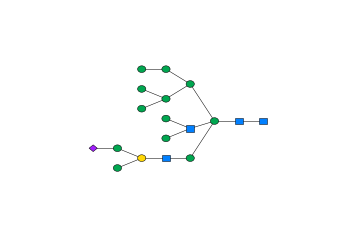

In [74]:
parsePlot(testTree)

In [75]:
# A BNF grammar for (right-to-left=conventional) linear code in 
#  'leftward-ascending normal form',  i.e. the rightmost child of any node has 
#  the lowest bond index = as you move leftward among a node's children, the 
#  bond index increases and vice versa. (No uncertainty operators.)
# 
# (exp) non-leftmost-branch* stem <- exp
# SU-with-bond-info* SU_bare (bond_type)  <- stem
# SU_bare bond-type bond-location  <- SU-with-bond-info
# b | a <- bond-type
# 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 <- bond-location
# '(' exp ')' <- non-leftmost-branch


# A grammar for left-to-right linear code in 'rightward-ascending' normal form:
# 
# exp -> stem non-rightmost-branch* (exp) 
# stem -> (bond_type) SU_bare SU-with-bond-info*
# SU-with-bond-info -> SU_bare bond-type bond-location
# bond-type -> a | b
# bond-location -> 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9
# non-rightmost-branch -> '(' exp ')'

In [163]:
def split_bond_information(saccharidue_unit_maybe_with_bond_information):
    su = saccharidue_unit_maybe_with_bond_information
    if su in SUs and su not in SUs_with_bonds:
        return (su, '', '')
    bond_location = su[-1]
    assert bond_location in '123456789' #or bond_location in '?'
    bond_type = su[-2] if su[-2] in 'ab?' and su[:-2] in SUs else ''
    SU_bare = desuffix(bond_type, desuffix(bond_location, su))
    return (SU_bare, bond_type, bond_location)


def is_chain_in_leftmost_path(tokens):
    if len(tokens) == 0:
        return True
    return all((each in SUs_with_bonds) or (each in SUs) for each in tokens)


def is_nonleftmost_branch(tokens):
    if len(tokens) == 0:
        return True
    has_left_paren = tokens[0] == '('
    has_right_paren = tokens[-1] == ')'
    balanced = has_balanced_parens(tokens)
    return has_left_paren and has_right_paren and balanced


def destem(tokens):
    if tokens[-1] == ')':
        return tuple([''])
    stem = tuple(reversed(list(takewhile(lambda token: token not in '()',
                                         list(reversed(tokens))))))
    rest = tuple(reversed(list(dropwhile(lambda token: token not in '()',
                                         list(reversed(tokens))))))
    return stem, rest


def get_rightmost_branch(nonleftmost_subtrees_as_token_seq):
    s = nonleftmost_subtrees_as_token_seq
    end_of_first_branch = len(s)
    for i in range(len(s)-1,-1,-1):
        if s[i] == '(' and is_nonleftmost_branch(s[i:]):
            return s[i:]
    raise Exception('Does not have a well-formed rightmost branch:\n{0}'.format(nonleftmost_subtrees_as_token_seq))
    
    
def parse_nonleftmost_branches(nonleftmost_subtrees_as_token_seq):
    s = nonleftmost_subtrees_as_token_seq
    
    #fixme convert this tail-recursive function to an iterative function...
    def split_nonleftmost_branch_helper(remainder, acc):
        if len(remainder) == 0:
            return acc, remainder
        elif remainder[-1] != ')':
            return acc, remainder
        rightmost_branch = get_rightmost_branch(remainder)
        new_remainder = desuffix(rightmost_branch, remainder)
        new_acc = acc + [rightmost_branch]
        return split_nonleftmost_branch_helper(new_remainder, new_acc)
    
    grouped_branches, tail = split_nonleftmost_branch_helper(s, [])
    unwrapped_groups = tuple(map(unwrap_branch_tokens, grouped_branches))
    parsed_groups = tuple(map(parse_tokens, unwrapped_groups))
    parsed_tail = parse_tokens(tail)
    return parsed_groups + tuple([parsed_tail])


def unwrap_branch_tokens(branch_tokens):
    s = branch_tokens
    assert s[0] == '(' 
    assert s[-1] == ')'
    return s[1:-1]


def parse_subtrees(rest_tokens):
    parsed_nonleftmost_subtrees = parse_nonleftmost_branches(rest_tokens)
    result = parsed_nonleftmost_subtrees
    return result

    
def parse_exp(linear_code_expression, style='stem-and-subtrees'):
    '''
    Converts `linear_code_expression` formatted according to this BNF rule 
    (assuming leftward-ascending normal form):
      (exp) non-leftmost-branch* stem <- exp
    as a dictionary (with ordering within sequences going from left-to-right).
    '''
    tokens = tokenizer(linear_code_expression)
    return parse_tokens(tokens, style)
    

def parse_tokens(tokens, style='stem-and-subtrees'):
    stem, rest = destem(tokens)
    if rest == tuple():
        stem_and_subtrees = {'stem':tuple(reversed(stem)),
                             'subtrees':rest}
    else:
        try:
            subtrees = parse_subtrees(rest)
        except Exception as e:
            print("Tried to parse\n{0}\n as 'rest'".format(rest))
            raise e
        stem_and_subtrees = {'stem':tuple(reversed(stem)), 'subtrees':subtrees}
    if style == 'stem-and-subtrees':
        return stem_and_subtrees
    elif style == 'func-and-args':
        return stem_and_subtrees_to_func_and_args(stem_and_subtrees)
    elif style == 's-exp':
        return func_and_args_to_sexps(stem_and_subtrees_to_func_and_args(stem_and_subtrees), True)

    
def stem_to_func_and_args(stem):
    if len(stem) == 1:
        tree = OrderedDict()
        tree['func'] = stem[0]
        tree['args'] = tuple()
        return tree
#         return {'func': stem[0], 'args':tuple()}
    tree = OrderedDict()
    tree['func'] = stem[0]
    tree['args'] = tuple([stem_to_func_and_args(stem[1:])])
    return tree
#     return {'func':stem[0], 'args':tuple([stem_to_func_and_args(stem[1:])])}
    
    
def rightmost_leaf(fa_tree):
    t = fa_tree
    if len(t['args']) == 0:
        return t
    return rightmost_leaf(t['args'][-1])
    
    
def stem_and_subtrees_to_func_and_args(stem_and_subtrees):
    stem_fa = stem_to_func_and_args(stem_and_subtrees['stem'])
    my_rightmost_leaf = rightmost_leaf(stem_fa)
    my_rightmost_leaf['args'] = list(map(stem_and_subtrees_to_func_and_args,
                                         stem_and_subtrees['subtrees']))
    return stem_fa

def func_and_args_to_sexps(func_and_args, unwrap_leaves=False, separate_args=False):
    tree = func_and_args
    if len(tree['args']) == 0:
        return '({0})'.format(tree['func'])
    s = '({0}'.format(tree['func'])
    body = ' '.join(['{0}'.format(func_and_args_to_sexps(arg, unwrap_leaves, False))
                     for arg in tree['args']])
    s += ' ' + body + ')'
#     print('pre-unwrapping: {0}'.format(s))
    
    if unwrap_leaves:
        split_s = s.split(' ')
        unwrapped = map(lambda token: unwrap_branch_tokens(token )if token[0] == '(' and token[-1] == ')' else token,
                        split_s)
        joined_s = ' '.join(unwrapped)
        s = joined_s
#     print('unwrapped: {0}'.format(s))
    
    def extract_and_format_arglabels(token):
        is_leaf = token[0] != '('# and token[-1] != ')'
#         assert is_leaf, "{0} is not a leaf".format(token)
        if is_leaf:
            arg_label = token[-2:] if token[-1] != ')' else token[-3:-1]
            arg = token[:-2] if token[-1] != ')' else token[:-3]
            end_symbol = '' if token[-1] != ')' else ''
            assert arg_label in bond_type_and_loc, "{0} is not a recognized bond type\nOriginal token = {1}".format(arg_label, token)

            formatted_arg = ':' + arg_label + ' ' + arg + end_symbol
            return formatted_arg
        assert token[0] == '(', '{0} is neither a leaf nor a head label'.format(token)
        arg_label = token[-2:]
        arg = token[:-2]
        assert arg_label in bond_type_and_loc, "{0} is not a recognized bond type\nOriginal token = {1}".format(arg_label, token)

        formatted_arg = ':' + arg_label + ' ' + arg
        return formatted_arg
    
    if separate_args:
        #FIXME
        print('Currently unsupported.')
#         print('s = {0}'.format(s))
#         split_s = s.split(' ')
#         print('split_s = {0}'.format(split_s))
#         formatted = [split_s[0]] + list(map(extract_and_format_arglabels, split_s[1:]))
#         joined_s = ' '.join(formatted)
#         s = joined_s
#         print('separated s = {0}'.format(s))
        
    return s

In [77]:
'Ma6'[-2:]
'Ma6'[:-2]

'a6'

'M'

In [78]:
pprint(stem_to_func_and_args(['Ma']))

{
  "func": "Ma", 
  "args": []
}


In [79]:
pprint(stem_to_func_and_args(['Ma', 'GNb2', 'NNa3']))

{
  "func": "Ma", 
  "args": [
    {
      "func": "GNb2", 
      "args": [
        {
          "func": "NNa3", 
          "args": []
        }
      ]
    }
  ]
}


In [166]:
parse_exp('Ma4Ma2Ma')
parse_exp('Ma4(Ma2)Ma')
parse_exp('Ma6(Ma4)(Ma2)Ma')
'----'
parse_exp('Ma4Ma2Ma', 'func-and-args')
parse_exp('Ma4(Ma2)Ma', 'func-and-args')
parse_exp('Ma6(Ma4)(Ma2)Ma', 'func-and-args')
'----'
func_and_args_to_sexps(parse_exp('Ma4Ma2Ma', 'func-and-args'))
func_and_args_to_sexps(parse_exp('Ma4(Ma2)Ma', 'func-and-args'))
func_and_args_to_sexps(parse_exp('Ma6(Ma4)(Ma2)Ma', 'func-and-args'))
'----'
func_and_args_to_sexps(parse_exp('Ma4Ma2Ma', 'func-and-args'), True)
func_and_args_to_sexps(parse_exp('Ma4(Ma2)Ma', 'func-and-args'), True)
func_and_args_to_sexps(parse_exp('Ma6(Ma4)(Ma2)Ma', 'func-and-args'), True)
'----'
parse_exp('Ma4Ma2Ma', 's-exp')
parse_exp('Ma4(Ma2)Ma', 's-exp')
parse_exp('Ma6(Ma4)(Ma2)Ma', 's-exp')

{'stem': ('Ma', 'Ma2', 'Ma4'), 'subtrees': ()}

{'stem': ('Ma',),
 'subtrees': ({'stem': ('Ma2',), 'subtrees': ()},
  {'stem': ('Ma4',), 'subtrees': ()})}

{'stem': ('Ma',),
 'subtrees': ({'stem': ('Ma2',), 'subtrees': ()},
  {'stem': ('Ma4',), 'subtrees': ()},
  {'stem': ('Ma6',), 'subtrees': ()})}

'----'

OrderedDict([('func', 'Ma'),
             ('args',
              (OrderedDict([('func', 'Ma2'),
                            ('args',
                             (OrderedDict([('func', 'Ma4'),
                                           ('args', [])]),))]),))])

OrderedDict([('func', 'Ma'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])])])])

OrderedDict([('func', 'Ma'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])]),
               OrderedDict([('func', 'Ma6'), ('args', [])])])])

'----'

'(Ma (Ma2 (Ma4)))'

'(Ma (Ma2) (Ma4))'

'(Ma (Ma2) (Ma4) (Ma6))'

'----'

'(Ma (Ma2 Ma4))'

'(Ma Ma2 Ma4)'

'(Ma Ma2 Ma4 Ma6)'

'----'

'(Ma (Ma2 Ma4))'

'(Ma Ma2 Ma4)'

'(Ma Ma2 Ma4 Ma6)'

In [81]:
stem_and_subtrees_to_func_and_args(parse_exp('Ma2Ma2Ma'))
stem_and_subtrees_to_func_and_args(parse_exp('Ma4(Ma2)Ma'))
stem_and_subtrees_to_func_and_args(parse_exp('Ma6(Ma4)(Ma2)Ma'))

OrderedDict([('func', 'Ma'),
             ('args',
              (OrderedDict([('func', 'Ma2'),
                            ('args',
                             (OrderedDict([('func', 'Ma2'),
                                           ('args', [])]),))]),))])

OrderedDict([('func', 'Ma'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])])])])

OrderedDict([('func', 'Ma'),
             ('args',
              [OrderedDict([('func', 'Ma2'), ('args', [])]),
               OrderedDict([('func', 'Ma4'), ('args', [])]),
               OrderedDict([('func', 'Ma6'), ('args', [])])])])

{'stem': ('Ma',),
 'subtrees': ({'stem': ('Ma2', 'Gb4'), 'subtrees': ()},
  {'stem': ('Ma4', 'GNb2'), 'subtrees': ()},
  {'stem': ('Ma6',),
   'subtrees': ({'stem': ('GNb2',),
     'subtrees': ({'stem': ('Ma4',), 'subtrees': ()},
      {'stem': ('GNa6',), 'subtrees': ()})},
    {'stem': ('GNb4',), 'subtrees': ()})})}

{
  "func": "Ma", 
  "args": [
    {
      "func": "Ma2", 
      "args": [
        {
          "func": "Gb4", 
          "args": []
        }
      ]
    }, 
    {
      "func": "Ma4", 
      "args": [
        {
          "func": "GNb2", 
          "args": []
        }
      ]
    }, 
    {
      "func": "Ma6", 
      "args": [
        {
          "func": "GNb2", 
          "args": [
            {
              "func": "Ma4", 
              "args": []
            }, 
            {
              "func": "GNa6", 
              "args": []
            }
          ]
        }, 
        {
          "func": "GNb4", 
          "args": []
        }
      ]
    }
  ]
}


'(Ma (Ma2 (Gb4)) (Ma4 (GNb2)) (Ma6 (GNb2 (Ma4) (GNa6)) (GNb4)))'

'(Ma (Ma2 Gb4) (Ma4 GNb2) (Ma6 (GNb2 Ma4 GNa6) GNb4))'

'(Ma (Ma2 Gb4) (Ma4 GNb2) (Ma6 (GNb2 Ma4 GNa6) GNb4))'

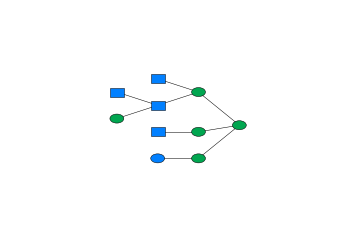

In [169]:
example_glycan = 'GNb4(GNa6(Ma4)GNb2)Ma6(GNb2Ma4)(Gb4Ma2)Ma'
# (Ma :a2 (M :b4 Gb)
#     :a4 (M :b2 GN)
#     :a6 (M :b2 (GN :a4 M
#                    :a6 GN)
#            :b4 GN))
parsePlot(example_glycan)
parse_exp(example_glycan, 'stem-and-subtrees')
pprint(stem_and_subtrees_to_func_and_args(parse_exp(example_glycan)))
func_and_args_to_sexps(parse_exp(example_glycan, 'func-and-args'), False)
func_and_args_to_sexps(parse_exp(example_glycan, 'func-and-args'), True)
parse_exp(example_glycan, 's-exp')

Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN


'(GN (GNb4 (Mb4 (Ma3 (GNb2 (Ab4 Ma3 (Ma6 NNa6)))) (GNb4 Ma3 Mb4) (Ma6 (Ma3 Ma3 Ma6) (Ma6 Ma3)))))'

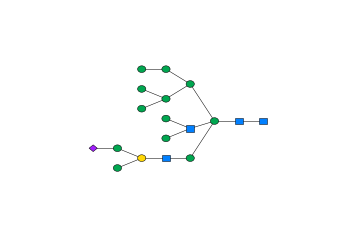

In [170]:
print(testTree)
parsePlot(testTree)
parse_exp(testTree, 's-exp')

## Krambeck et al. 2009's `ligand` "..." uncertainty operator

`...` is supposed to match "Any string (possibly empty) with parentheses matched" (Table 7)

In [83]:
def is_ligand_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for) `...`.
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return has_balanced_parens(s)

In [84]:
def get_ligand_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `ligand` uncertainty operator `...`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_ligand_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_ligand_match, subsequences))

Let's investigate an example tree that has some subtrees (with their own subtrees...):

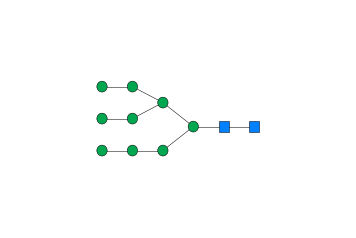

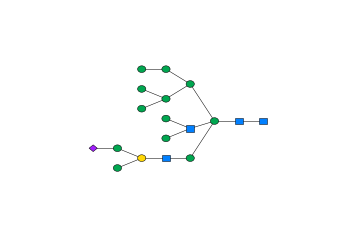

In [85]:
my_tree = LCEs[0]
parsePlot(my_tree)

my_tree = testTree
parsePlot(my_tree)

In [86]:
my_ligand_matches, my_nonmatches = split(is_ligand_match, 
                                         generate_subsequences(tokenizer(my_tree)))

len(my_ligand_matches), len(my_nonmatches)

(81, 384)

For ease of investigation/analysis it will be useful if we can isolate the subset of ligand uncertainty operator matches that are plottable from those that aren't:

/home/AD/emeinhar/anaconda3/envs/glypy/lib/python2.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


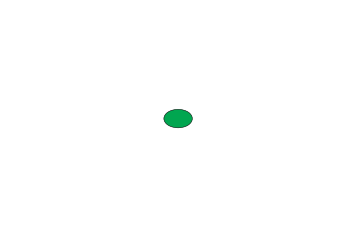

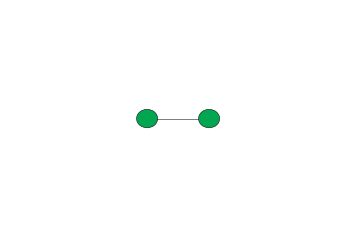

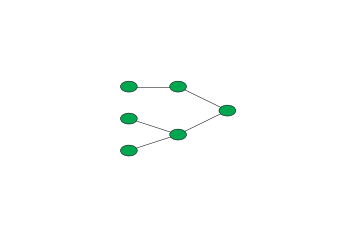

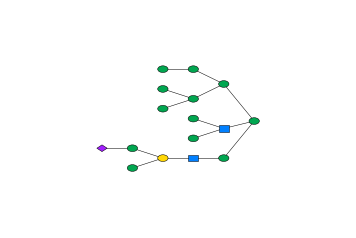

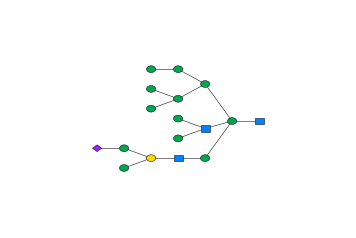

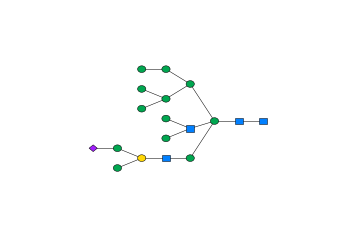

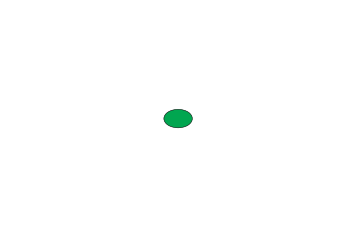

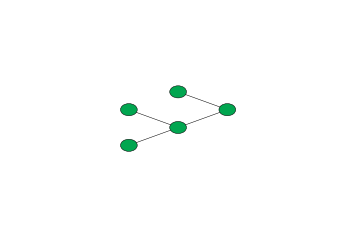

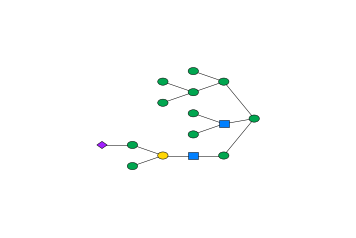

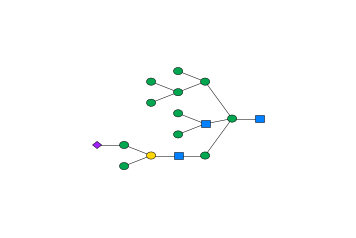

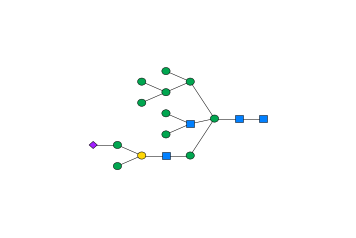

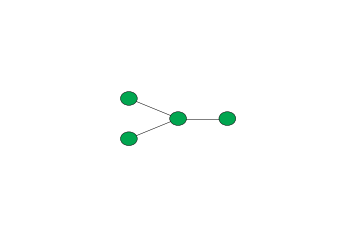

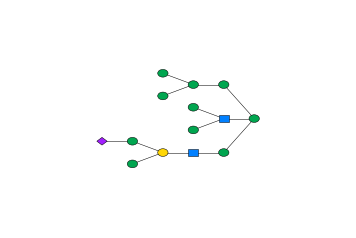

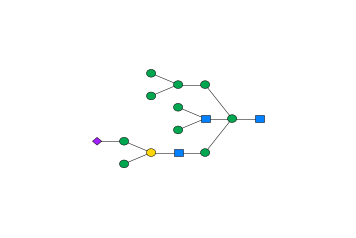

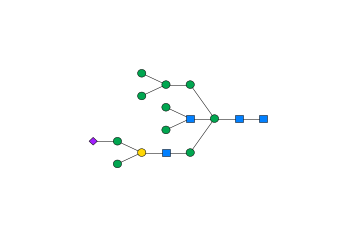

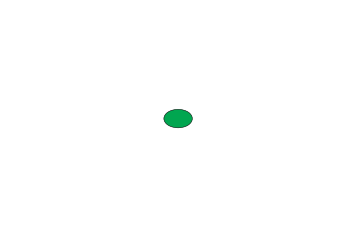

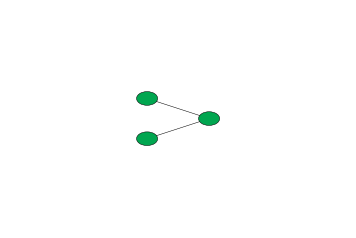

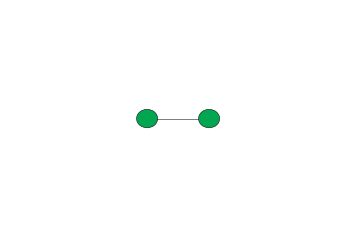

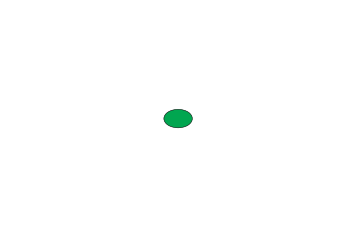

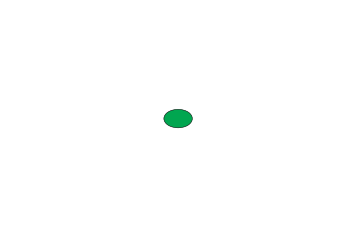

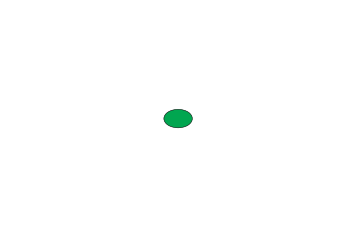

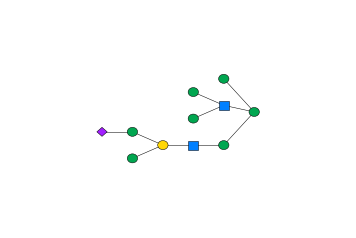

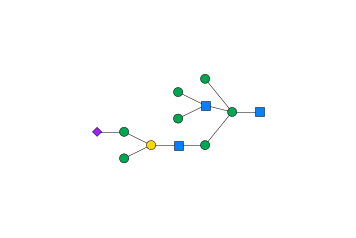

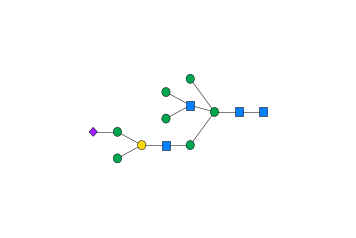

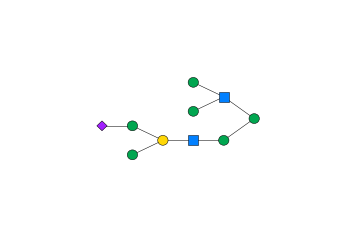

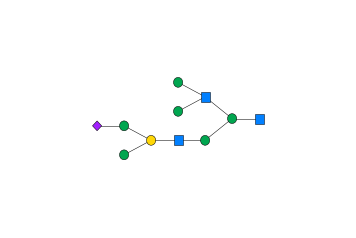

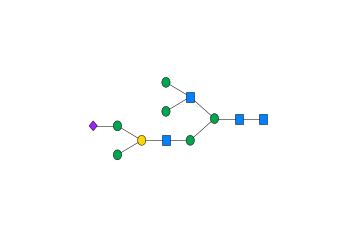

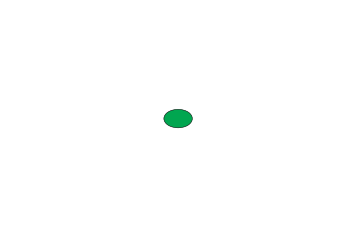

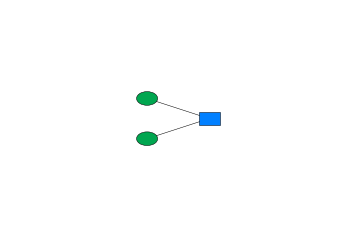

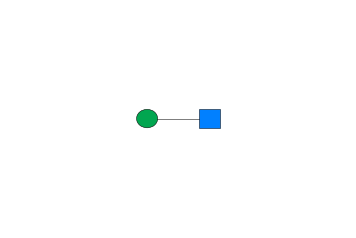

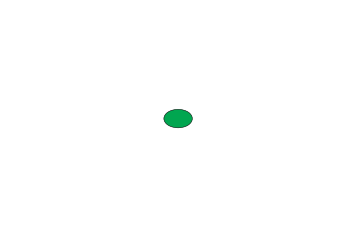

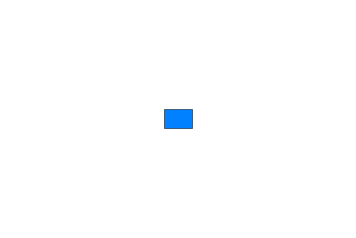

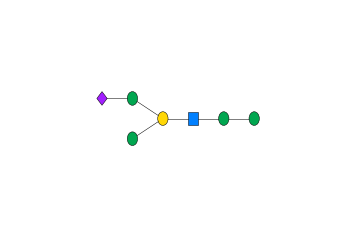

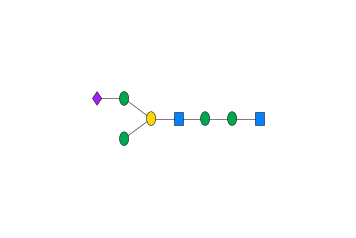

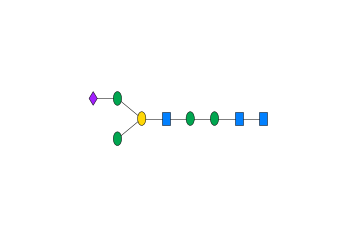

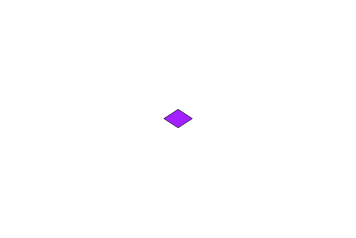

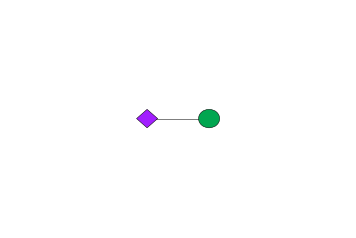

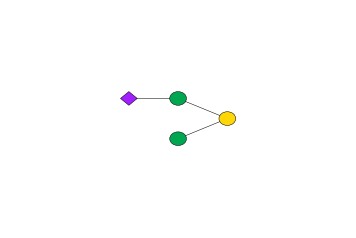

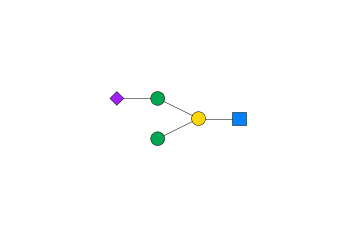

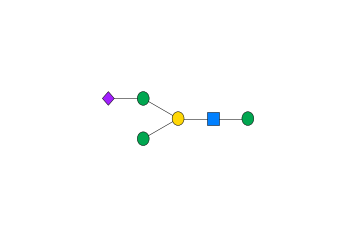

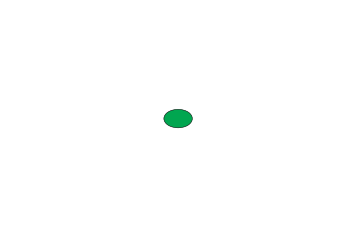

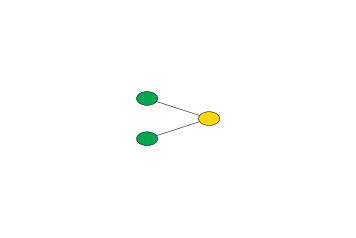

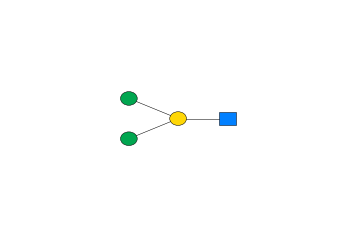

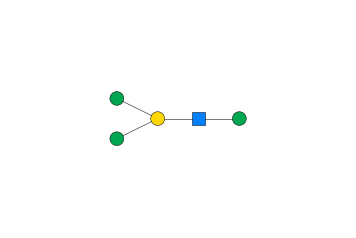

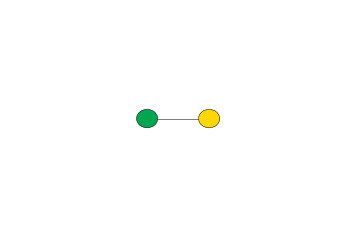

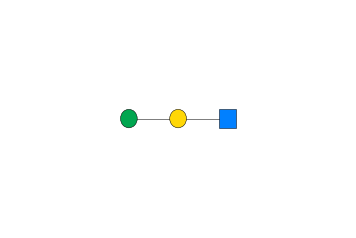

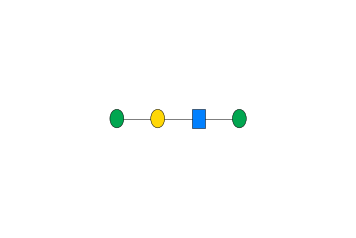

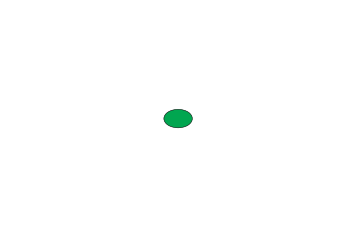

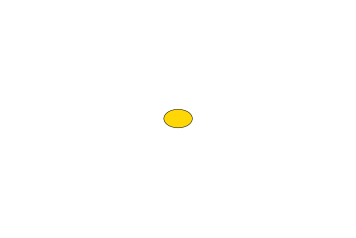

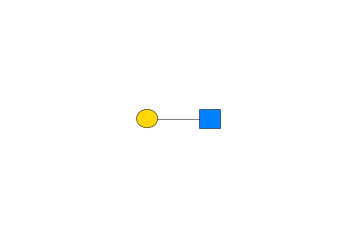

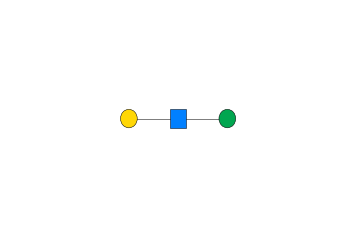

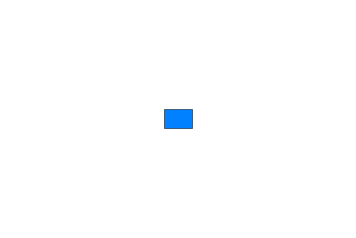

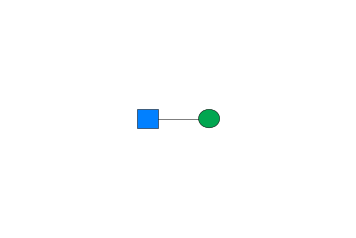

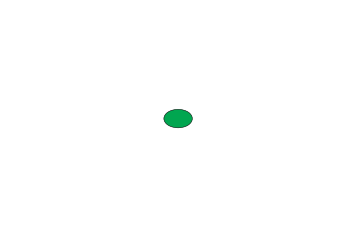

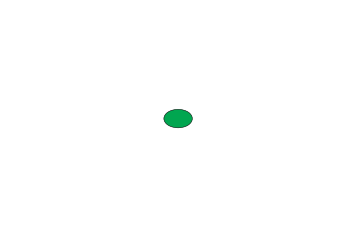

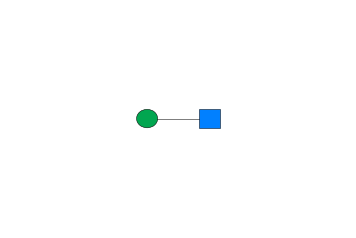

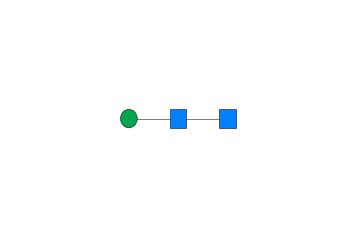

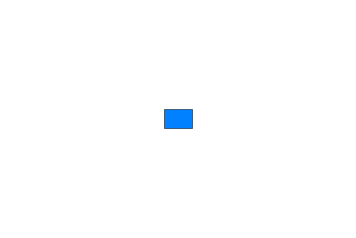

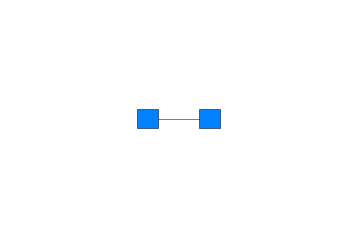

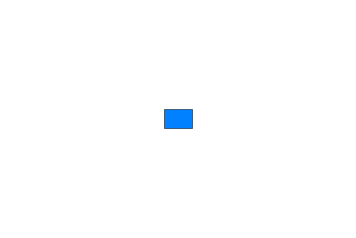

In [87]:
ligand_plottables = set()
ligand_unplottables = set()
for each_match in my_ligand_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        ligand_plottables.add(each_lc)
    except Exception as e:
        ligand_unplottables.add(each_lc)

'Well-formed' (plottable/`glypy`-parseable) matches to the ligand wildcard are all
 - chains
 - chains with (sub)trees (which may be trees or themselves contain trees, which ...)
 - chains with subtrees, but where in at least one case (viz. when the match ends with a left parenthesis), the stem and a right branch are captured by the wildcard, but the left branch is not.

In [88]:
len(ligand_plottables)

50

In [89]:
list(ligand_plottables)

['Ma6(Ma3)Ab4GNb2Ma3',
 'Ab4GNb2Ma3',
 'GNb4GN',
 '(Ma3)Ab4GNb2Ma3',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6',
 '(Ma3)Ab4GNb2',
 'Mb4(Ma3)GNb4',
 'Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ab4GNb2',
 'Mb4GNb4',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma3Ma6',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'Mb4',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'NNa6Ma6',
 'Ma6(Ma3)Ab4',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'NNa6Ma6(Ma3)Ab4GNb2Ma3',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '(Ma3)GNb4',
 'NNa6Ma6(Ma3)Ab4GNb2',
 'Ma6(Ma6(Ma3)Ma3)Ma6',
 '(Ma3)Ab4',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 '(Ma6(Ma3)Ma3)Ma6',
 'Mb4GNb4GN',
 'Ab4',
 'NNa6',
 'GN',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma6(Ma3)Ma3',
 'Ma3Ma6(M

In [90]:
#These all start with a parenthesis
ligand_unplottables

{'(Ma3)',
 '(Ma6(Ma3)Ma3)',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Mb4(Ma3)GNb4)',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Ma3Ma6(Ma6(Ma3)Ma3)',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Ma6(Ma3)',
 'Ma6(Ma6(Ma3)Ma3)',
 'Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Ma6(Mb4(Ma3)GNb4)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Mb4(Ma3)',
 'NNa6Ma6(Ma3)'}

In [91]:
# for lce in LCEs:
#     print("{0}: {1}".format(lce, get_ligand_matches(lce)))

## Krambeck et al. 2009's `continuation` "_" uncertainty operator

`_` is supposed to match "Any string (possibly empty) where every '(' is matched with a following ')'" (Table 7)

In [92]:
def is_continuation_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for `_`).
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return every_left_paren_has_a_right_paren(s)

In [93]:
def get_continuation_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `continuation` uncertainty operator `_`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_continuation_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_continuation_match, subsequences))

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

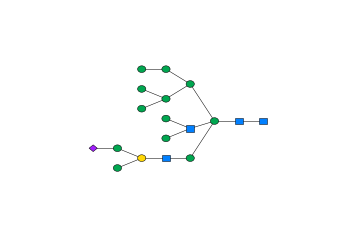

In [94]:
my_tree
parsePlot(my_tree)

In [95]:
my_continuation_matches, my_continuation_nonmatches = split(is_continuation_match, 
                                                            generate_subsequences(tokenizer(my_tree)))

len(my_continuation_matches), len(my_continuation_nonmatches)

(205, 260)

As noted above, it will be useful for ease of investigation/analysis  if we can isolate the subset of continuation uncertainty operator matches that are plottable from those that aren't:

/home/AD/emeinhar/anaconda3/envs/glypy/lib/python2.7/site-packages/glypy/structure/monosaccharide.py:424: UnknownCompositionWarning: x could not be found. It may not have an explicit composition
  composition = _get_standard_composition(self)


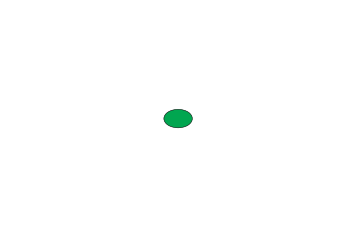

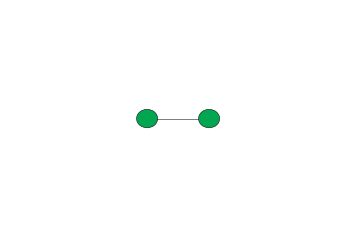

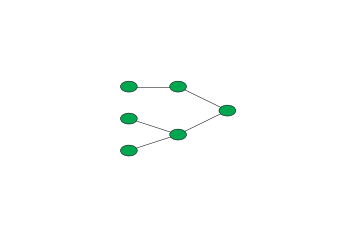

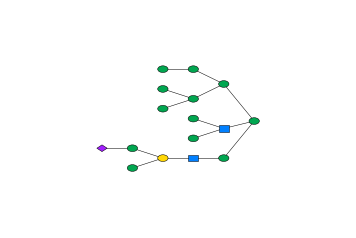

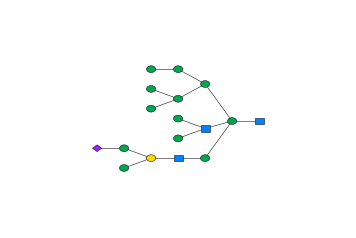

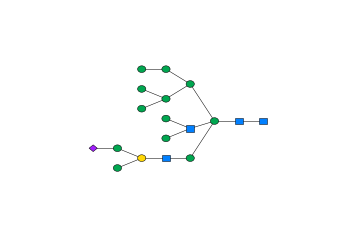

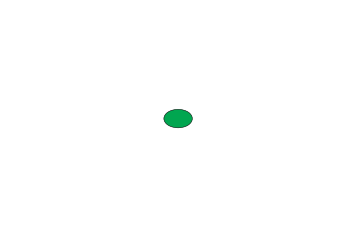

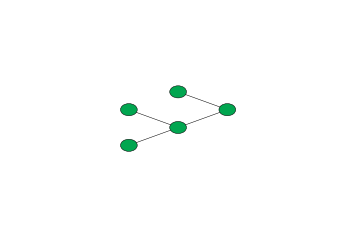

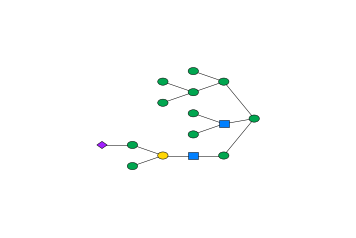

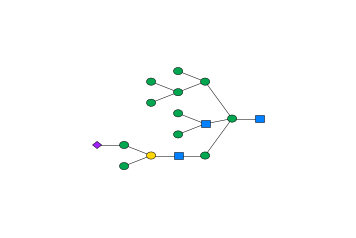

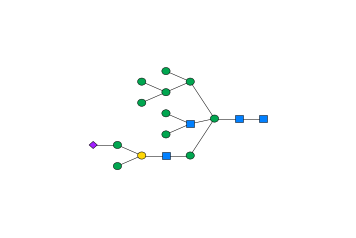

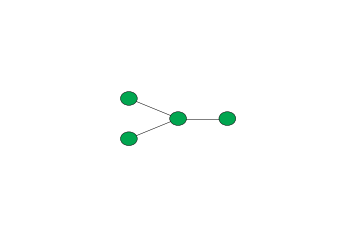

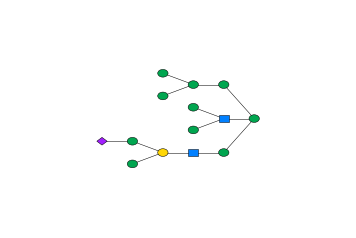

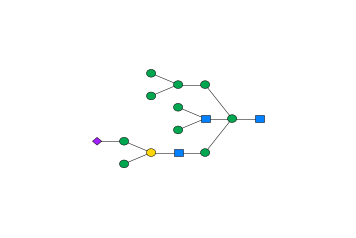

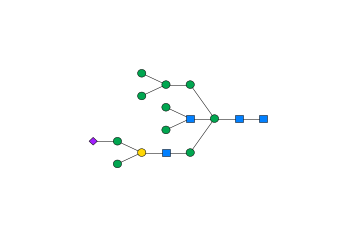

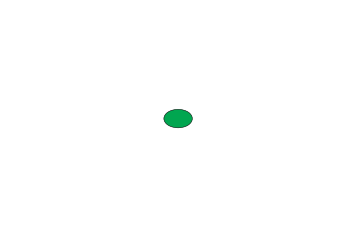

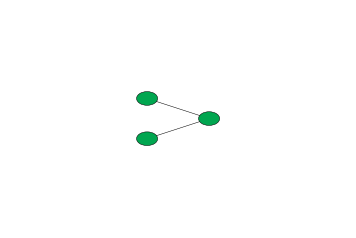

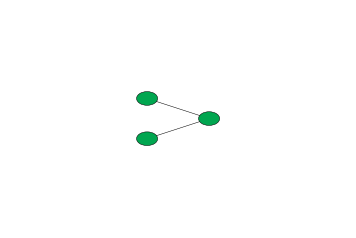

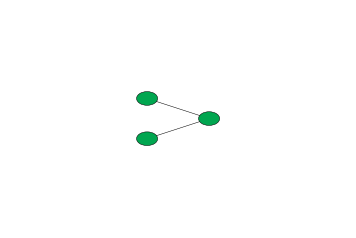

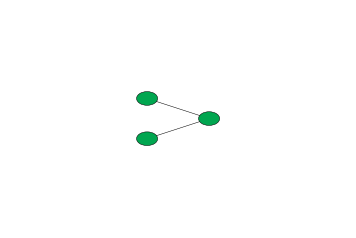

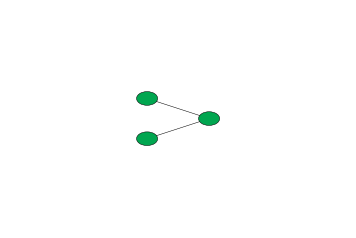

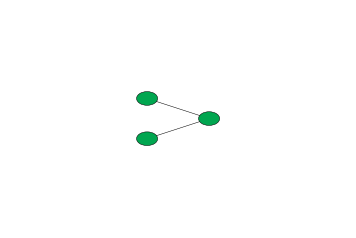

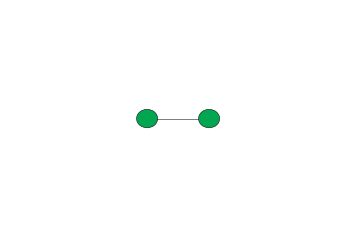

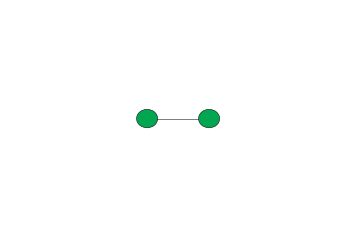

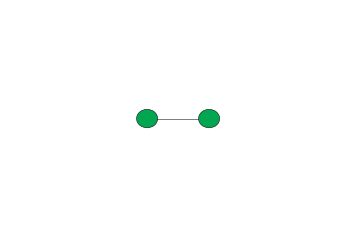

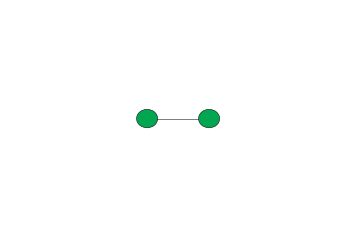

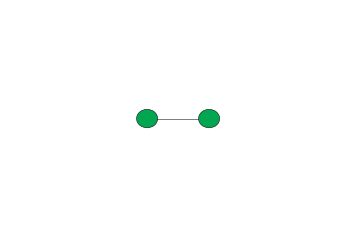

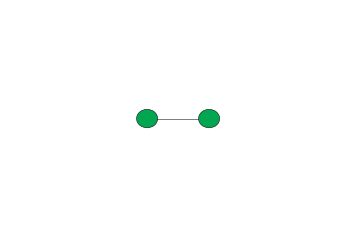

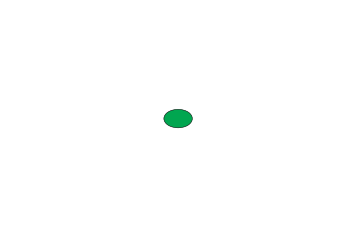

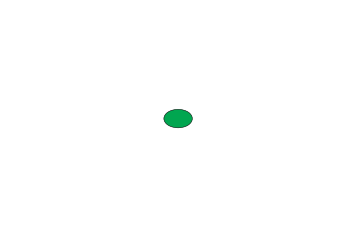

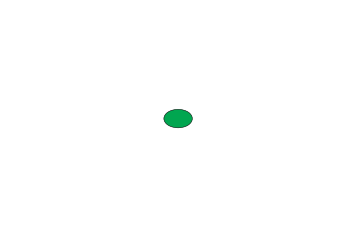

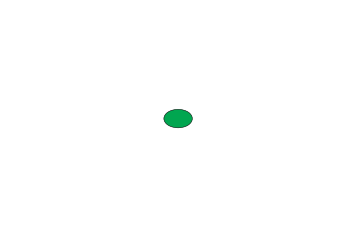

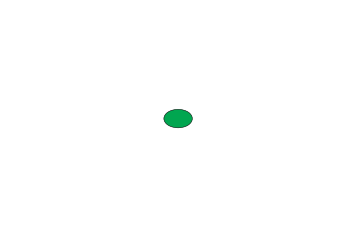

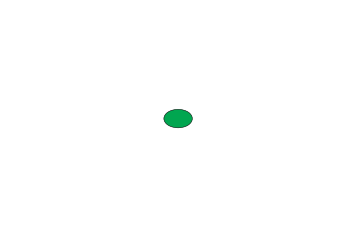

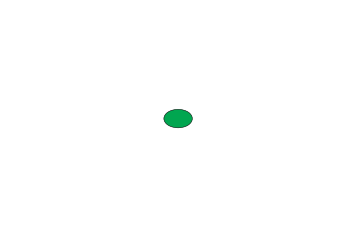

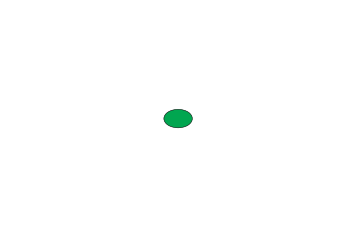

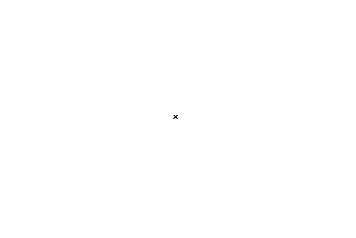

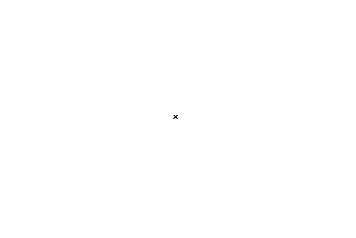

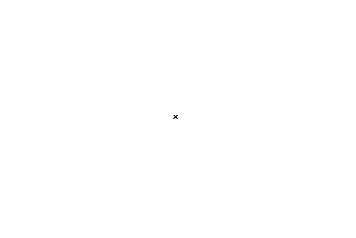

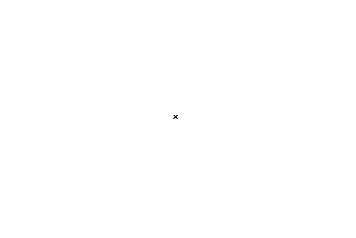

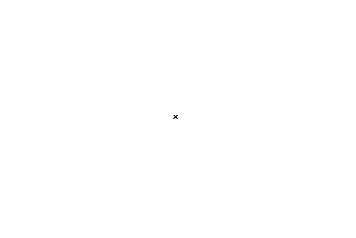

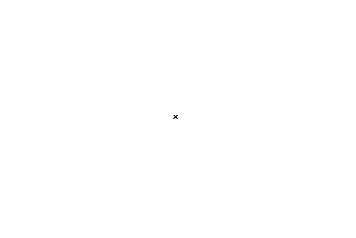

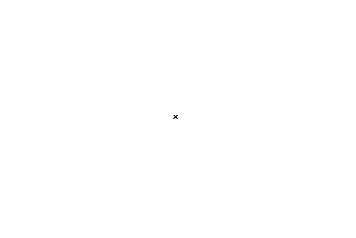

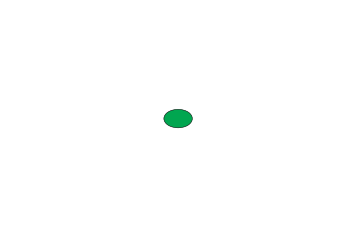

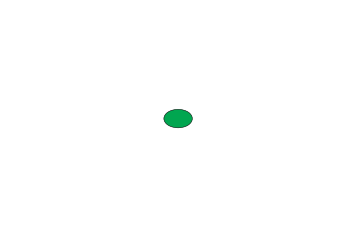

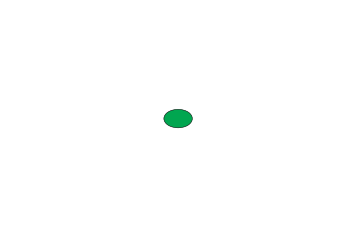

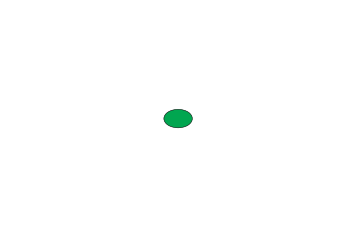

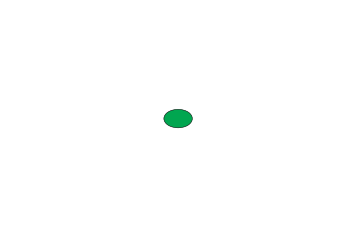

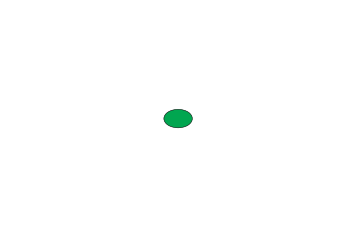

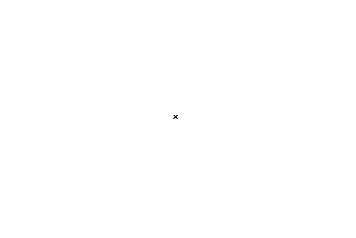

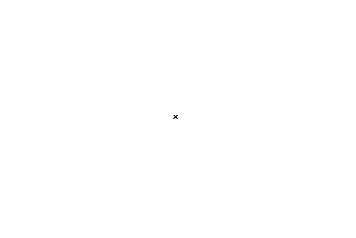

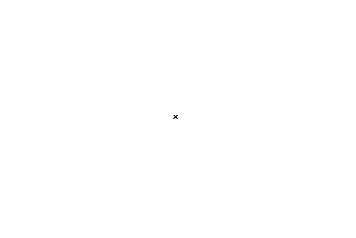

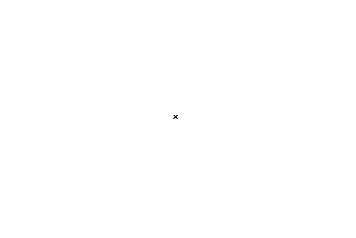

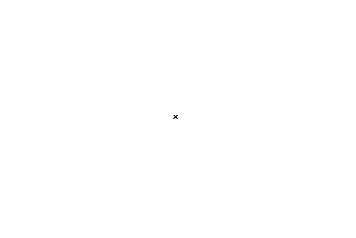

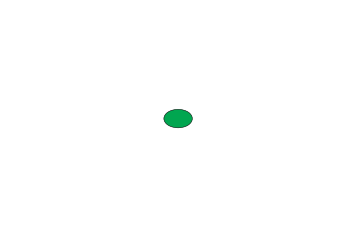

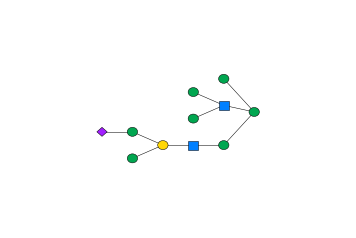

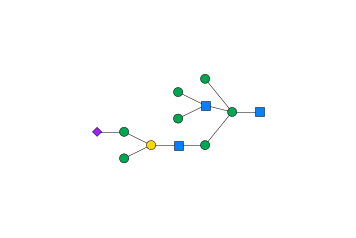

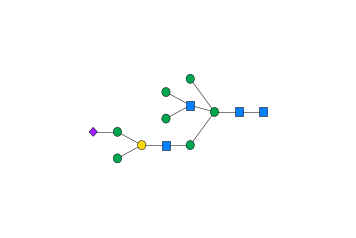

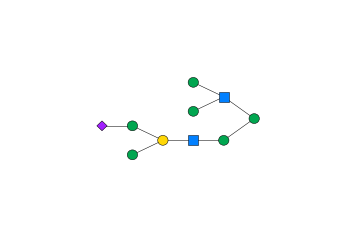

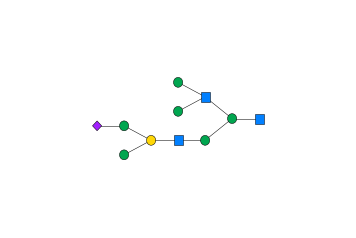

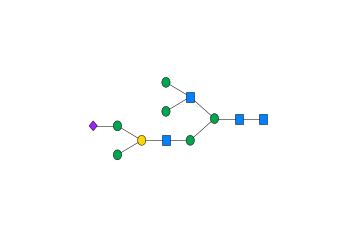

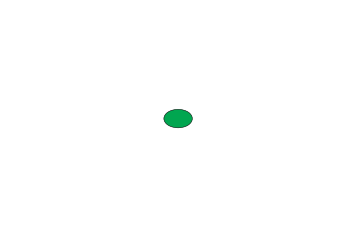

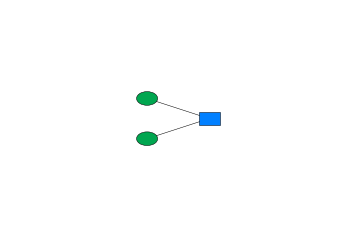

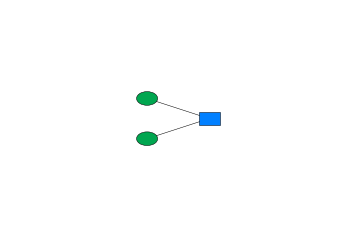

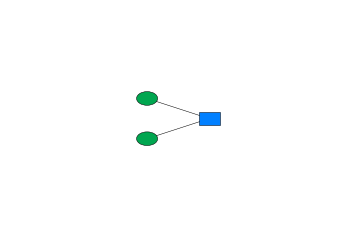

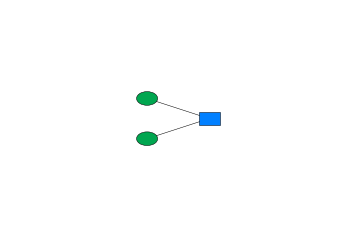

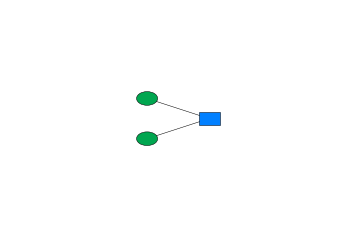

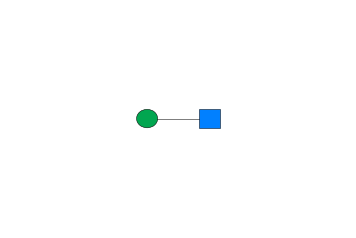

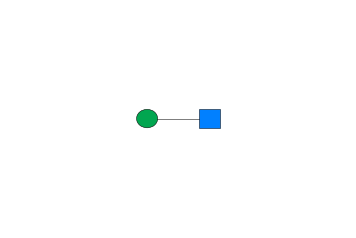

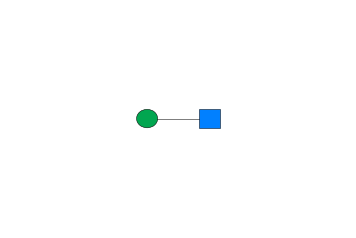

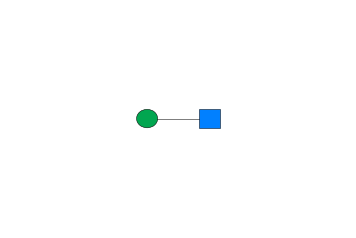

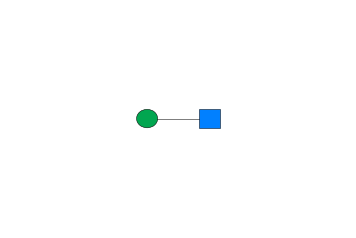

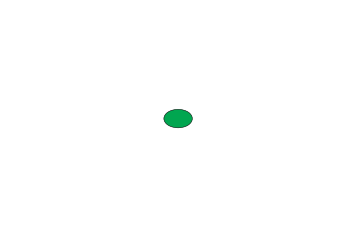

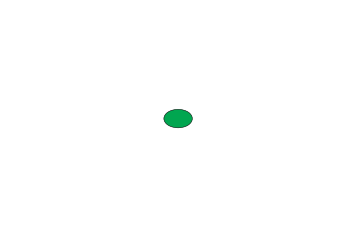

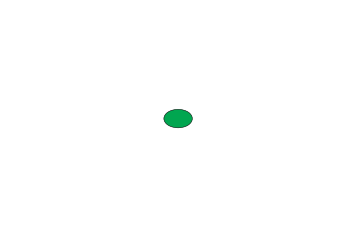

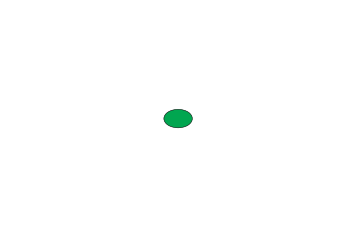

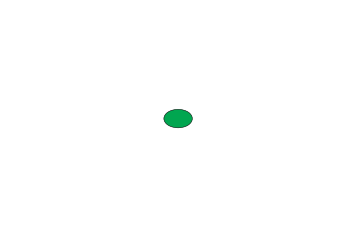

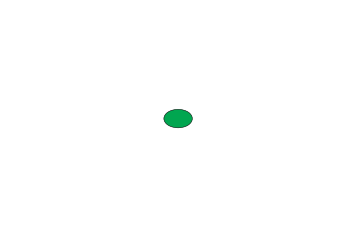

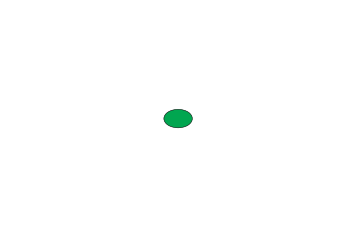

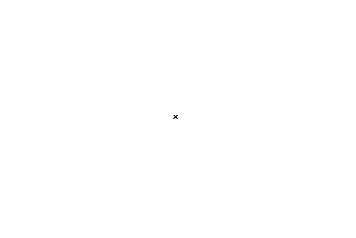

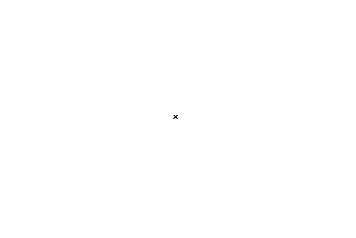

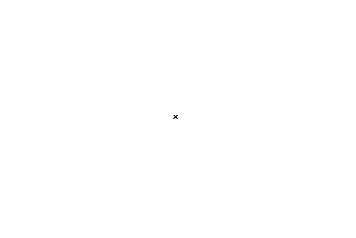

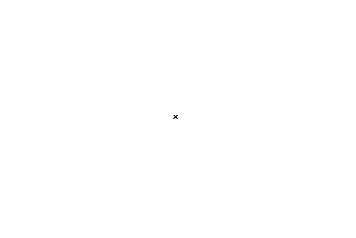

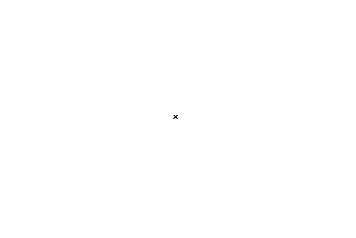

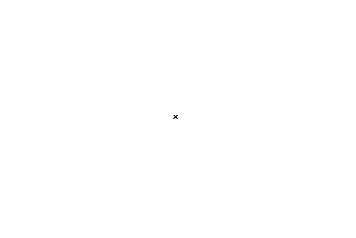

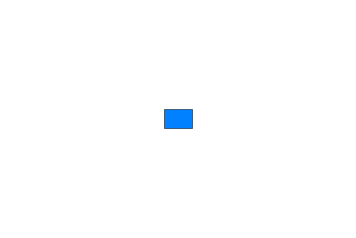

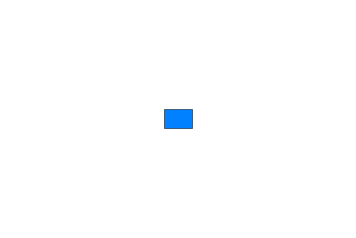

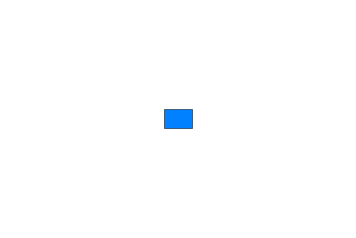

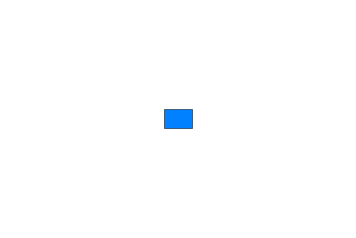

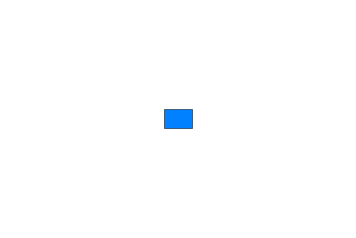

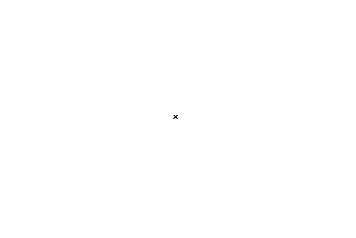

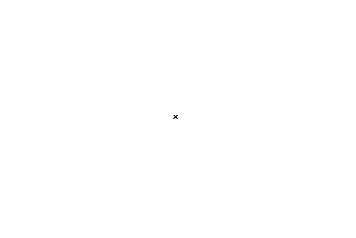

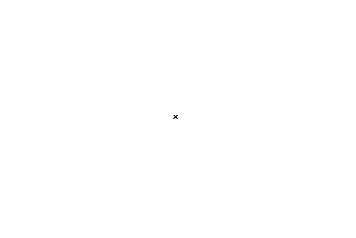

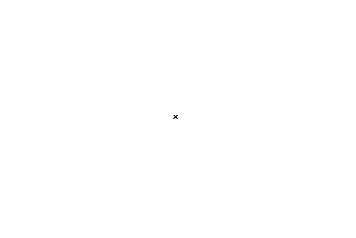

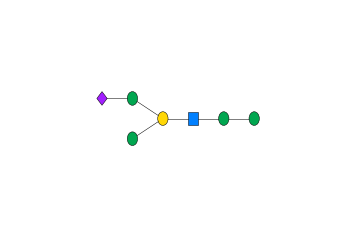

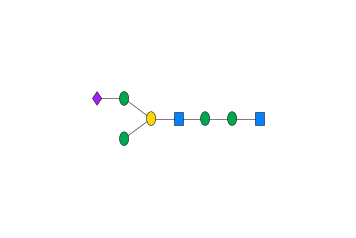

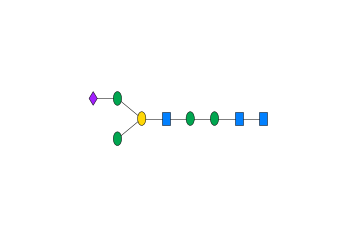

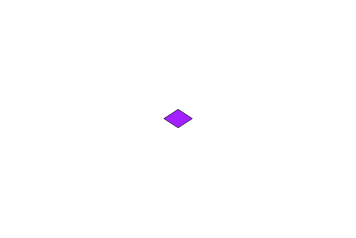

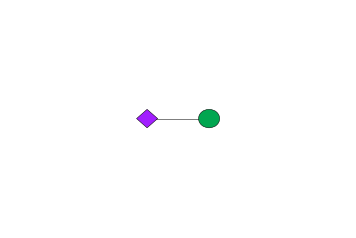

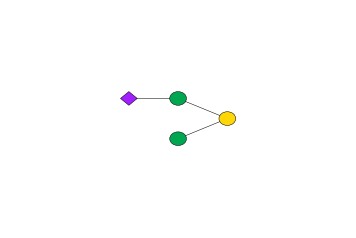

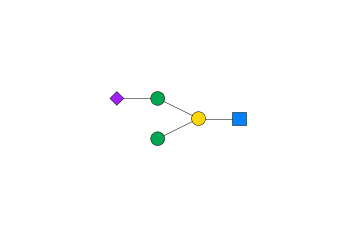

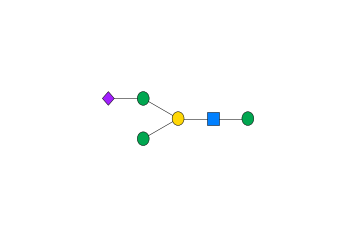

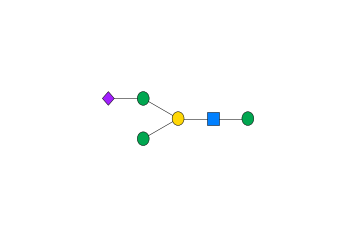

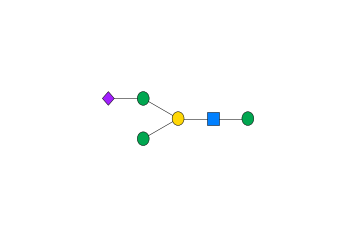

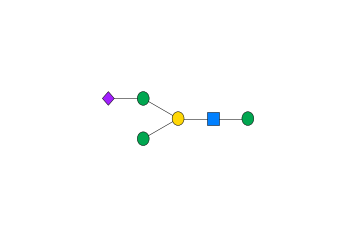

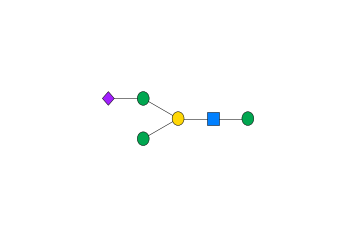

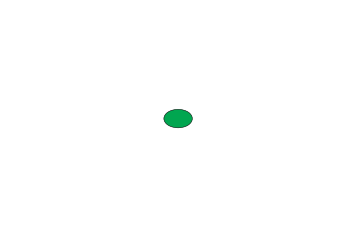

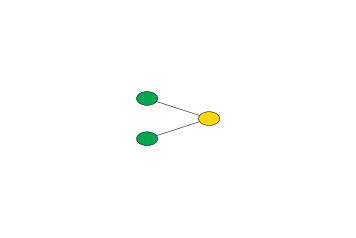

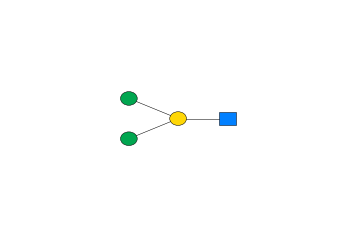

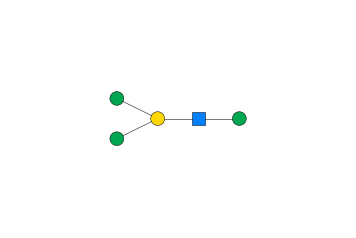

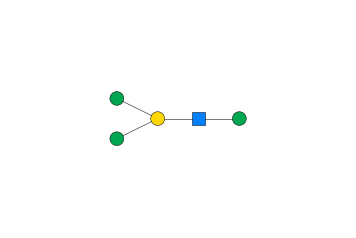

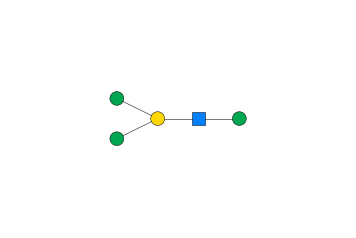

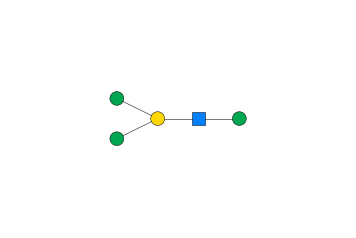

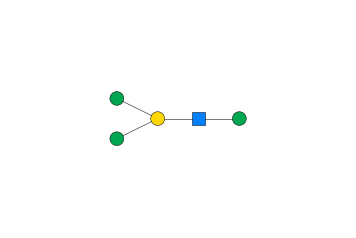

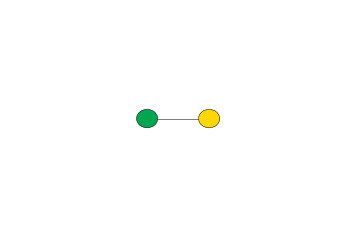

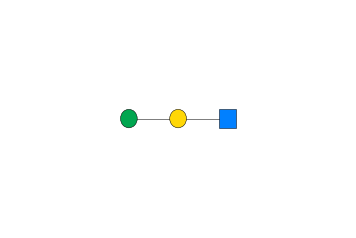

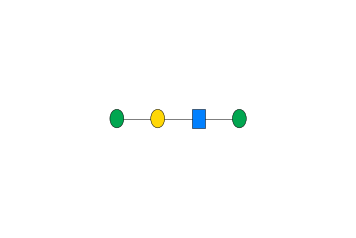

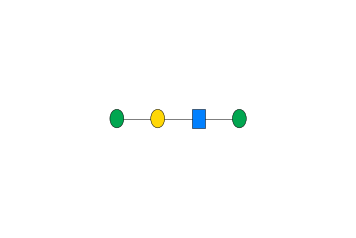

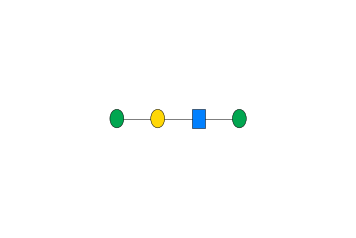

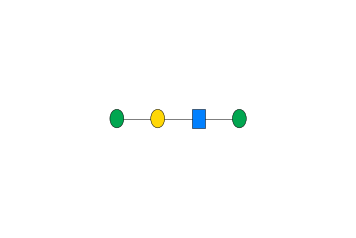

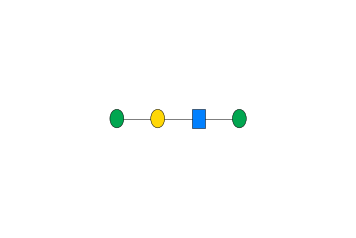

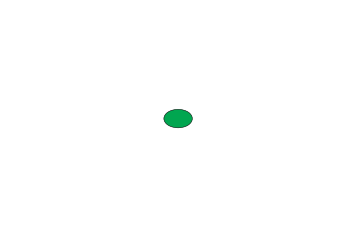

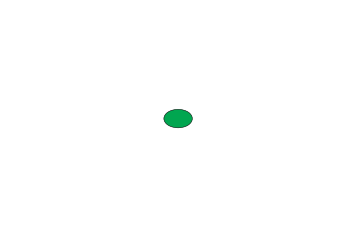

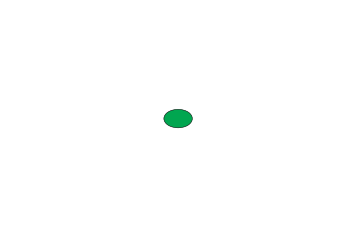

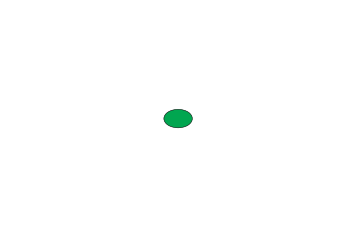

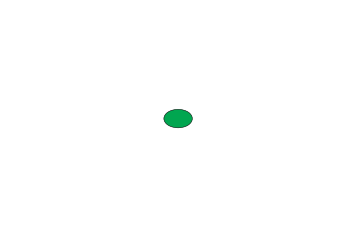

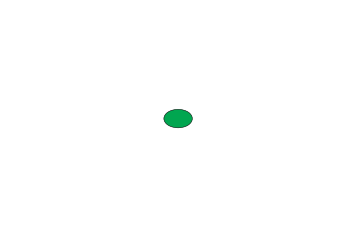

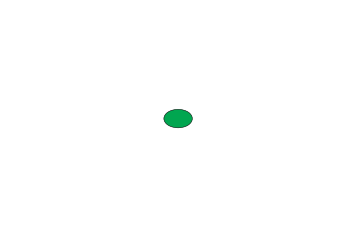

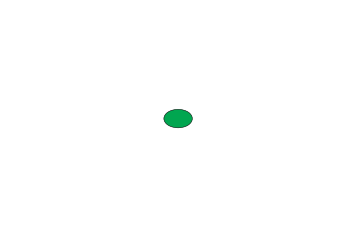

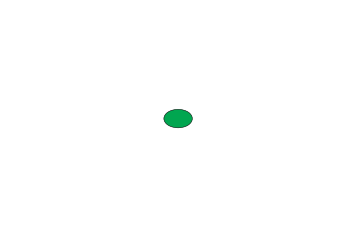

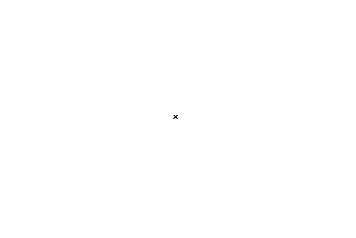

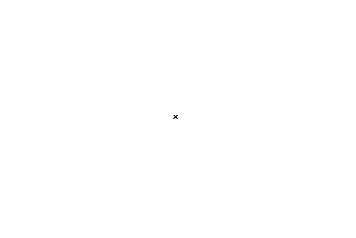

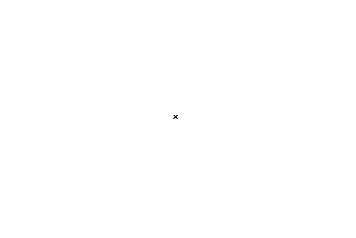

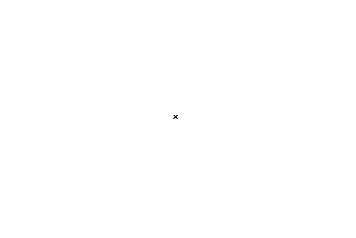

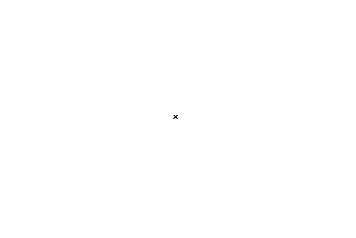

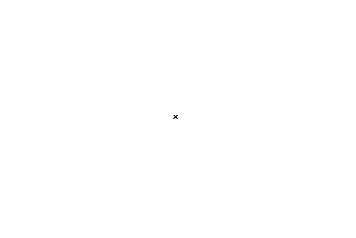

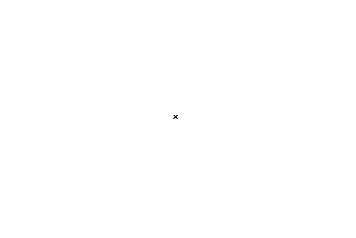

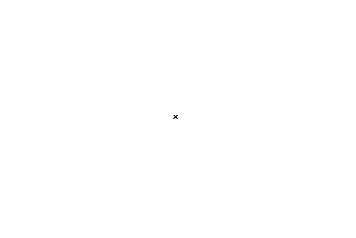

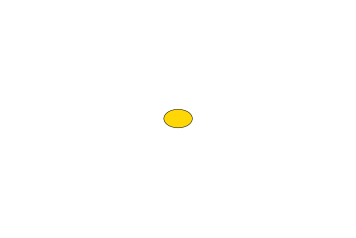

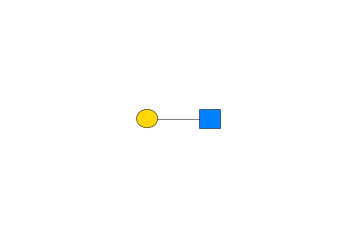

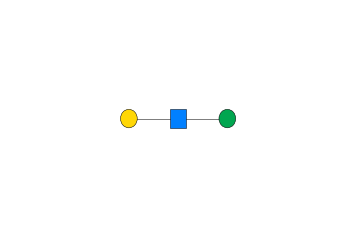

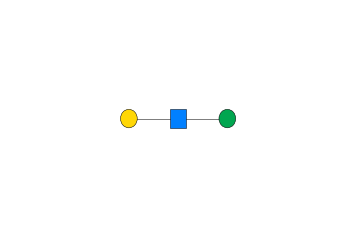

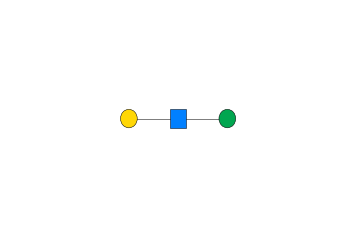

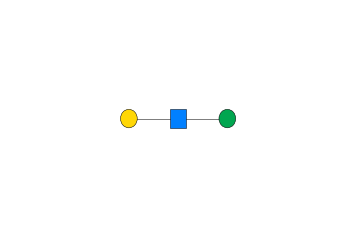

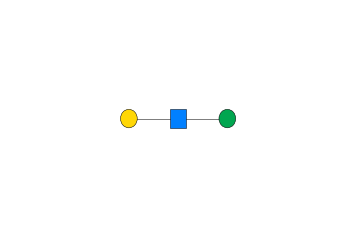

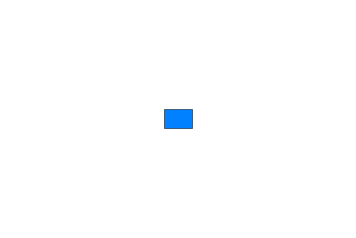

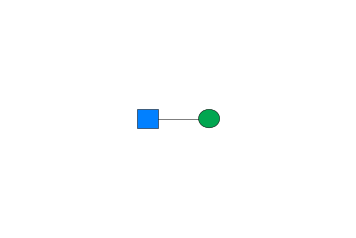

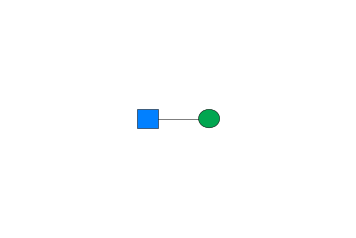

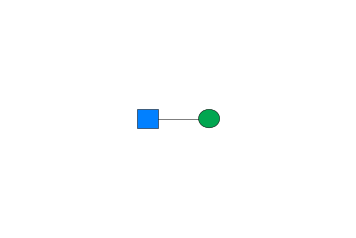

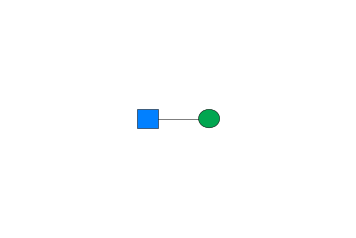

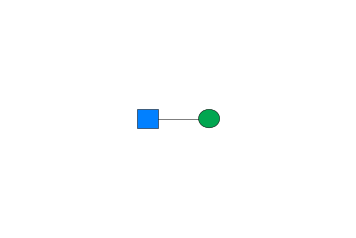

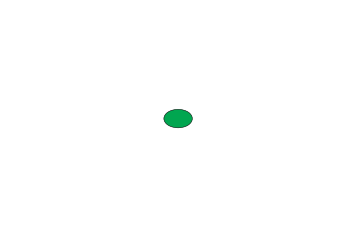

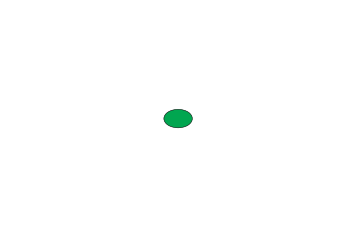

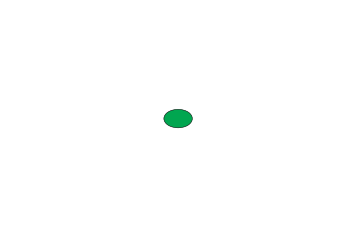

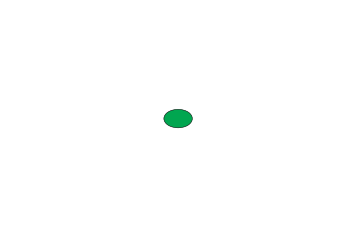

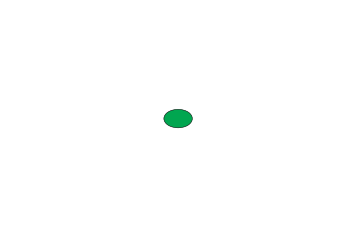

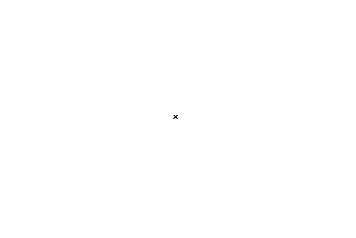

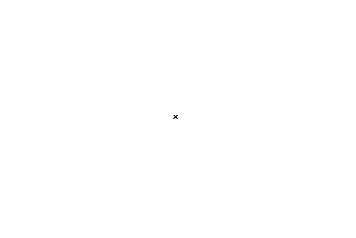

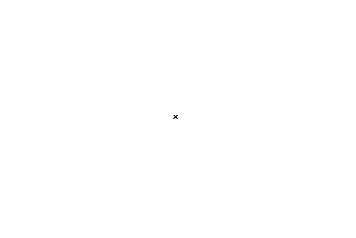

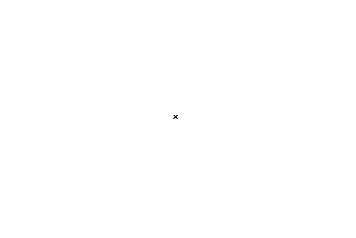

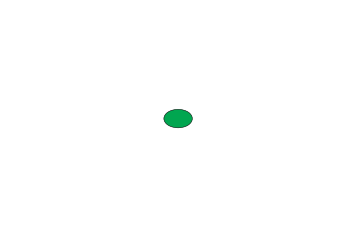

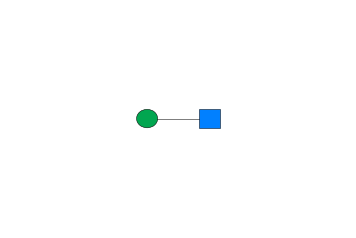

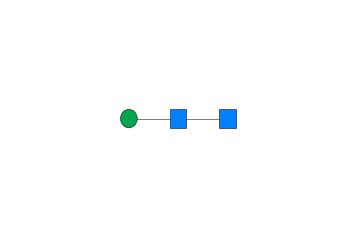

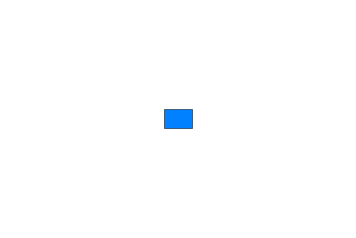

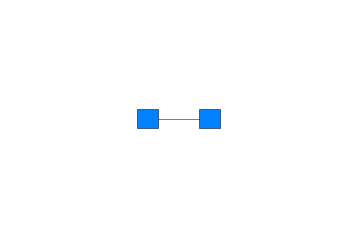

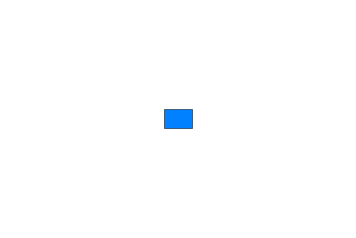

In [96]:
continuation_plottables = set()
continuation_unplottables = set()
for each_match in my_continuation_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        continuation_plottables.add(each_lc)
    except Exception as e:
        continuation_unplottables.add(each_lc)

In [97]:
my_tree

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

In [98]:
list(continuation_plottables)

['(Ma3)GNb4)',
 'Ab4GNb2Ma3',
 ')Ab4GNb2Ma3)Mb4',
 'Ma6(Ma3)Ma3)Ma6',
 ')Ab4GNb2Ma3)Mb4GNb4GN',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ma3)Mb4',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma3)Ab4GNb2Ma3)Mb4',
 'Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ma3)Ma3)Ma6',
 'Mb4GNb4',
 ')Ma3)Ma6',
 '(Ma3)Ab4GNb2',
 'GNb4GN',
 'GNb2Ma3)',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 ')GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'GN',
 '(Ma3)Ab4GNb2Ma3',
 '(Ma3)Ma3',
 'Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GNb2Ma3',
 ')Ab4GNb2Ma3)Mb4GNb4',
 'Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma3)Ab4',
 ')Mb4GNb4G

In [99]:
#These all start with a parenthesis.
list(continuation_unplottables)

['Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'NNa6Ma6(Ma3)',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Mb4(Ma3)GNb4)',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma6(Ma3)Ma3)',
 'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma6(Mb4(Ma3)GNb4)',
 'GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)',
 'Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 'Ma6(Ma3)',
 'Mb4(Ma3)',
 'Ma6(Ma6(Ma3)Ma3)',
 '(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)',
 'Ma3Ma6(Ma6(Ma3)Ma3)',
 'Ma6(Ma6(Ma3)Ma3)Ma6(

## Identifying what continuation wildcards can capture that ligand wildcards can't

Recall that all matches are based on:

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

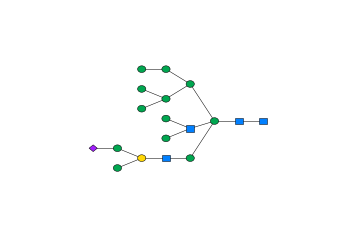

In [100]:
my_tree
parsePlot(my_tree)

### Continuation matches are a superset of ligand matches

In [101]:
len(my_ligand_matches)
len(my_continuation_matches)

81

205

In [102]:
len(set(map(tuple, my_ligand_matches)))
len(set(map(tuple, my_continuation_matches)))

my_ligand_matches_unique = set(map(tuple, my_ligand_matches))
my_continuation_matches_unique = set(map(tuple, my_continuation_matches))

68

183

In [103]:
len(my_ligand_matches_unique - my_continuation_matches_unique)
len(my_continuation_matches_unique - my_ligand_matches_unique)

0

115

As might be expected from their definitions, `ligand` wildcard matches are a proper subset of `continuation` matches.

### What's unique to continuation matches?

Let's take a look at what's unique to `continuation` matches relative to `ligand` matches:

In [104]:
map(partial(str_join, ''),
    (my_continuation_matches_unique - my_ligand_matches_unique))

# map(partial(str_join, ' '),
#     (my_continuation_matches_unique - my_ligand_matches_unique))

['GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma3)',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')Ab4GNb2Ma3)Mb4GNb4',
 'Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 'Ma6(Ma3)Ma3)Ma6',
 'Ma3)Ma6(Mb4(Ma3)GNb4)',
 '(Ma3)Ab4GNb2Ma3)',
 'Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'Ma3)Ab4GNb2Ma3)Mb4GNb4',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')',
 'Ma3)Ma3',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')Ab4GNb2Ma3)',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 ')Ma3',
 ')Ma6(Mb4(Ma3)GNb4)',
 '(Ma3)Ab4GNb2Ma3)Mb4',
 ')Ab4GNb2',
 'M

In [105]:
#less garbage than the cell above
set(continuation_plottables) - set(ligand_plottables)

{'(Ma3)Ab4GNb2Ma3)',
 '(Ma3)Ab4GNb2Ma3)Mb4',
 '(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '(Ma3)GNb4)',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '(Ma3)Ma3)',
 '(Ma3)Ma3)Ma6',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 ')(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')Ab4',
 ')Ab4GNb2',
 ')Ab4GNb2Ma3',
 ')Ab4GNb2Ma3)',
 ')Ab4GNb2Ma3)Mb4',
 ')Ab4GNb2Ma3)Mb4GNb4',
 ')Ab4GNb2Ma3)Mb4GNb4GN',
 ')GNb4',
 ')GNb4)',
 ')GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 ')GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 ')Ma3',
 ')Ma3)',
 ')Ma3)Ma6',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 '

Suppose a continuation wildcard `_` appears in a string `l_r` where `l` and `r` are such that `l_r` is a well-formed linear code expression. Let 'the context (of a continuation token)' denote `l,r`.

Continuation wildcards can match substrings `s` describing trees where at least one node branches, and it is neither the case that 
 - the rightmost subtree `b_r` of this branching is completely specified by `s`: how does it continue? as a chain? as a subtree? if as a subtree, what are its non-rightmost subbranches? All such questions must be answerable by `l`.
 - the branch/subtree `b_l` to the left of `b_r` is described by `s`

Let's see left contexts for continuation matches:

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

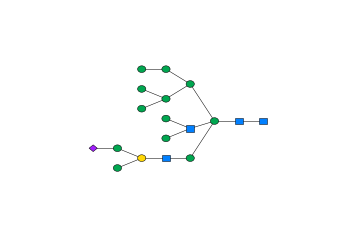

In [106]:
my_tree
parsePlot(my_tree)

In [107]:
my_continuation_matches_w_contexts, _ = split(is_continuation_match, 
                                              generate_subsequences(tokenizer(my_tree), 
                                                                    with_contexts=True))

len(my_continuation_matches_w_contexts)

465

In [108]:
print(my_continuation_matches_w_contexts[0])

([], ['Ma3'], ['Ma6', '(', 'Ma6', '(', 'Ma3', ')', 'Ma3', ')', 'Ma6', '(', 'Mb4', '(', 'Ma3', ')', 'GNb4', ')', '(', 'NNa6', 'Ma6', '(', 'Ma3', ')', 'Ab4', 'GNb2', 'Ma3', ')', 'Mb4', 'GNb4', 'GN'])


'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

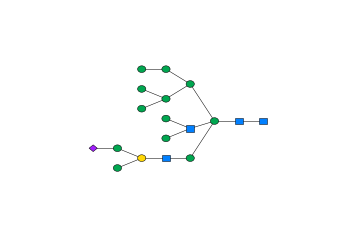

In [109]:
my_tree
parsePlot(my_tree)

In [110]:
plottable_matches_w_contexts = tuple(filter(lambda lcr: lcr[1] in set(continuation_plottables) - set(ligand_plottables),
                                            map(lambda lcr: tuple(map(partial(str_join, ''), lcr)),
                                                my_continuation_matches_w_contexts)))
plottable_matches_w_contexts

(('Ma3Ma6(',
  'Ma6(Ma3)Ma3)',
  'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'),
 ('Ma3Ma6(',
  'Ma6(Ma3)Ma3)Ma6',
  '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'),
 ('Ma3Ma6(',
  'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
  'GNb4GN'),
 ('Ma3Ma6(',
  'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
  'GN'),
 ('Ma3Ma6(',
  'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
  ''),
 ('Ma3Ma6(Ma6',
  '(Ma3)Ma3)',
  'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'),
 ('Ma3Ma6(Ma6',
  '(Ma3)Ma3)Ma6',
  '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'),
 ('Ma3Ma6(Ma6',
  '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
  'GNb4GN'),
 ('Ma3Ma6(Ma6',
  '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
  'GN'),
 ('Ma3Ma6(Ma6',
  '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
  ''),
 ('Ma3Ma6(Ma6(',
  'Ma3)',
  'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'),
 ('Ma3Ma6(Ma6(',
  'Ma3)Ma3',
  

In [111]:
def removeUnbalancedCloseParens(s):
    clean_s = ''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
            clean_s += x
        elif x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
                clean_s += x
        else:
            clean_s += x
    return clean_s

In [112]:
test_cases = ['()', '(())', ')', '())', '))', ')())']

for each in test_cases:
    removeUnbalancedCloseParens(each)

'()'

'(())'

''

'()'

''

'()'

In [113]:
def removeDanglingBondLocation(lce):
    if lce[0] in bonds:
        return lce[1:]
    return lce

In [177]:
def analyze_match(i, matches):
    match = matches[i]
    l = match[0]
    c = match[1]
    r = match[2]
    tree = l + c + r
    ti = 'Whole tree:\n\t{0}'.format(tree)
#     ti = 'Whole tree:\n\t{0}\n\t= {1}'.format(tree, parse_exp(tree, 's-exp'))
    
    lci = "Left context:\n\t{0}".format(l)
    mi = "Match:\n\t{0}".format(c)
    rci = "Right context:\n\t{0}".format(r)
    
    print(ti + '\n' + lci + '\n' + mi + '\n' + rci)
    
    parsePlot(l + c + r)
    print('Showing whole tree...')
    
    try:
        parsePlot(l)
        print('Showing left context plot...')
    except Exception as e:
        try:
            parsePlot(l[:-1])
            print('Showing left context plot...')
        except Exception as e:
            print('Left context not plottable.')
    
    parsePlot(removeUnbalancedCloseParens(c))
    print('Showing match plot...')
    
    try:
        parsePlot(r)
        print('Showing right context plot...')
    except Exception as e:
        try:
            parsePlot(removeDanglingBondLocation(r))
#             parsePlot(removeUnbalancedCloseParens(r))
            print('Showing right context plot...')
        except Exception as e:
            print('Right context not plottable.')


Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(
Match:
	Ma6(Ma3)Ma3)
Right context:
	Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


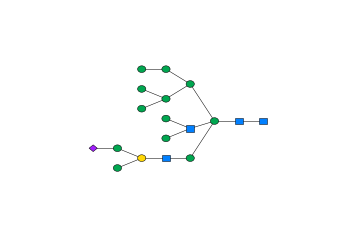

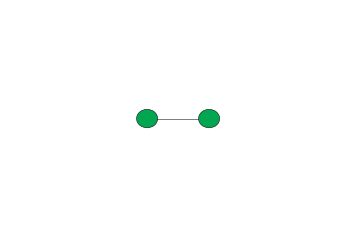

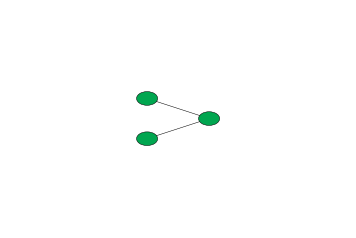

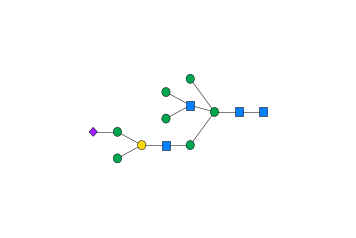

In [178]:
analyze_match(0, plottable_matches_w_contexts)

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(
Match:
	Ma6(Ma3)Ma3)Ma6
Right context:
	(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


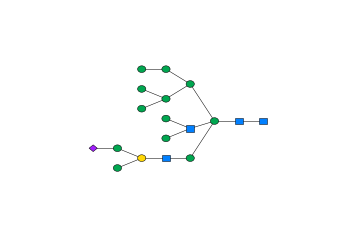

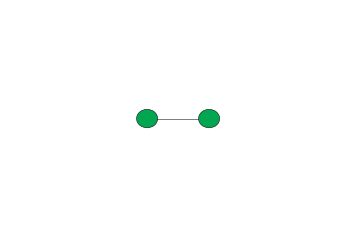

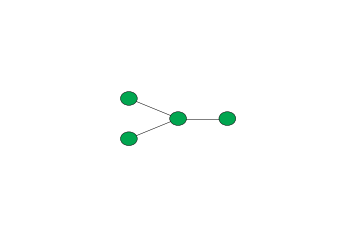

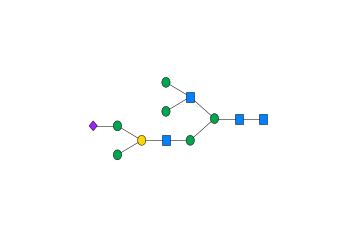

In [116]:
analyze_match(1, plottable_matches_w_contexts)

('Ma3Ma6(',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(
Match:
	Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4
Right context:
	GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


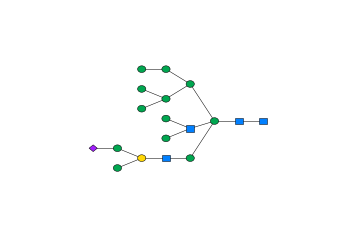

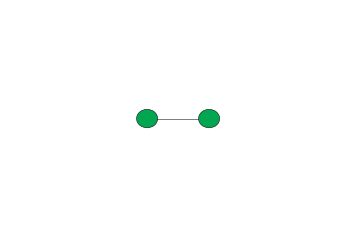

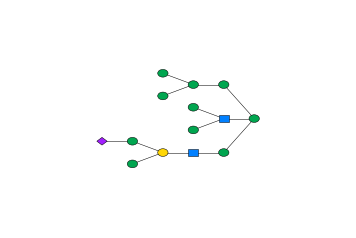

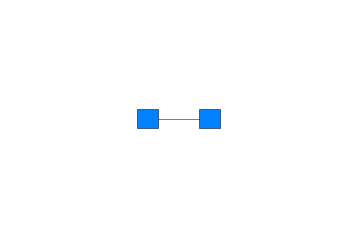

In [117]:
plottable_matches_w_contexts[2]
analyze_match(2, plottable_matches_w_contexts)

('Ma3Ma6(',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(
Match:
	Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4
Right context:
	GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


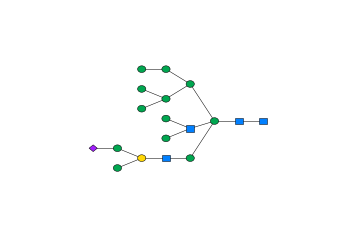

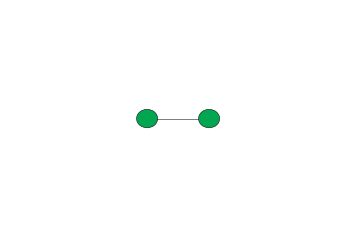

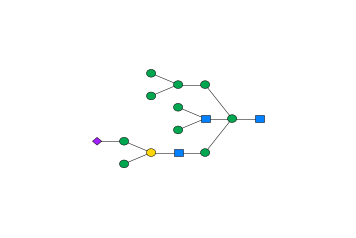

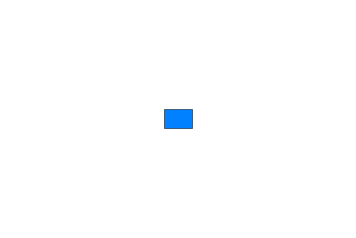

In [118]:
plottable_matches_w_contexts[3]
analyze_match(3, plottable_matches_w_contexts)

('Ma3Ma6(',
 'Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(
Match:
	Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Right context:
	
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


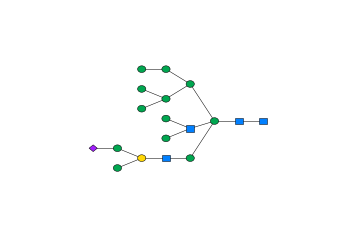

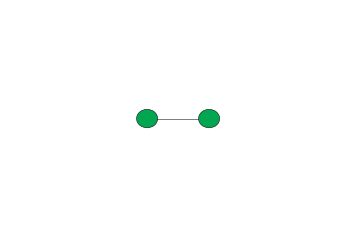

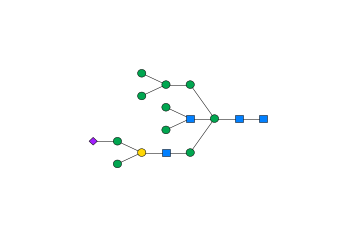

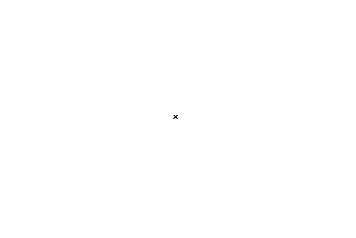

In [119]:
plottable_matches_w_contexts[4]
analyze_match(4, plottable_matches_w_contexts)

('Ma3Ma6(Ma6',
 '(Ma3)Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6
Match:
	(Ma3)Ma3)
Right context:
	Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


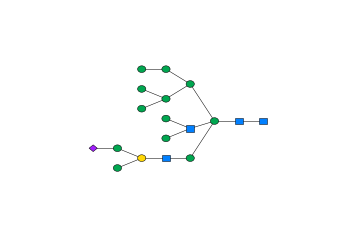

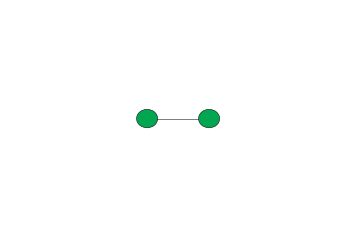

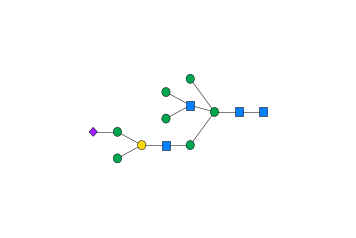

In [120]:
plottable_matches_w_contexts[5]
analyze_match(5, plottable_matches_w_contexts)

('Ma3Ma6(Ma6',
 '(Ma3)Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6
Match:
	(Ma3)Ma3)Ma6
Right context:
	(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


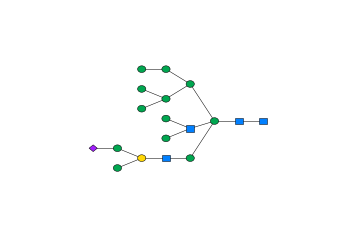

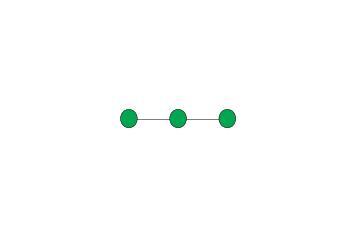

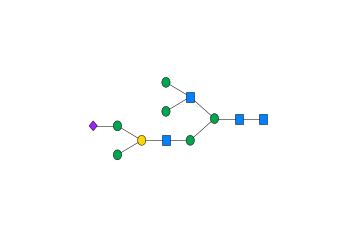

In [121]:
plottable_matches_w_contexts[6]
analyze_match(6, plottable_matches_w_contexts)

('Ma3Ma6(Ma6',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6
Match:
	(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4
Right context:
	GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


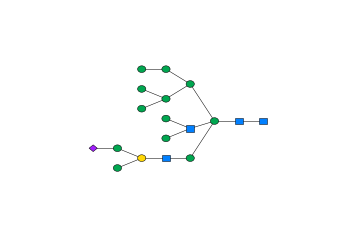

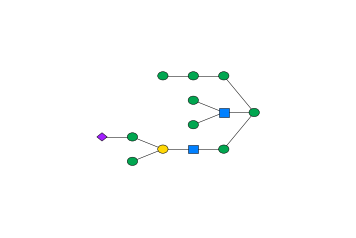

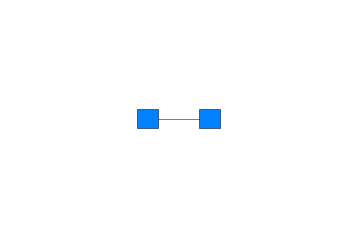

In [122]:
plottable_matches_w_contexts[7]
analyze_match(7, plottable_matches_w_contexts)

('Ma3Ma6(Ma6',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6
Match:
	(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4
Right context:
	GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


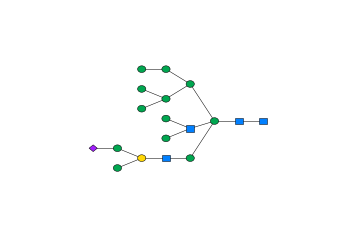

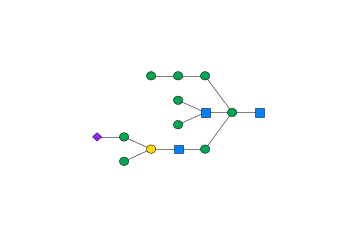

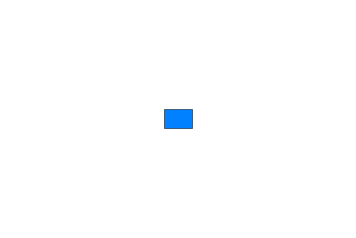

In [123]:
plottable_matches_w_contexts[8]
analyze_match(8, plottable_matches_w_contexts)

('Ma3Ma6(Ma6',
 '(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6
Match:
	(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Right context:
	
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


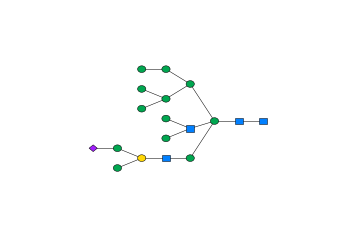

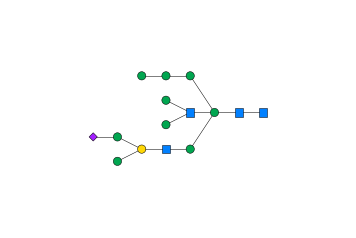

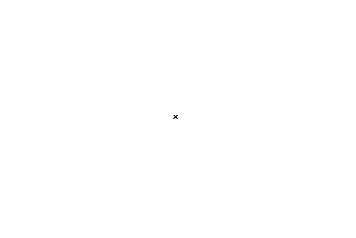

In [124]:
plottable_matches_w_contexts[9]
analyze_match(9, plottable_matches_w_contexts)

('Ma3Ma6(Ma6(',
 'Ma3)',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(
Match:
	Ma3)
Right context:
	Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


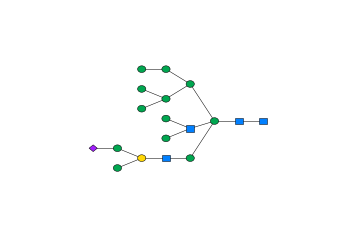

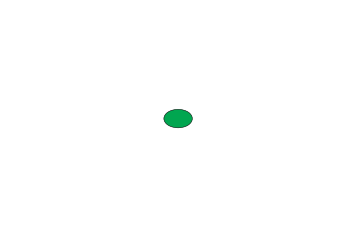

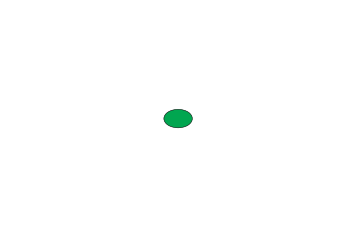

In [125]:
plottable_matches_w_contexts[10]
analyze_match(10, plottable_matches_w_contexts)

('Ma3Ma6(Ma6(',
 'Ma3)Ma3',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(
Match:
	Ma3)Ma3
Right context:
	)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


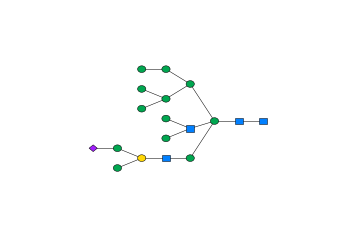

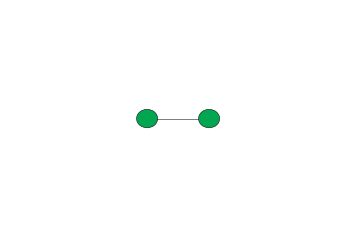

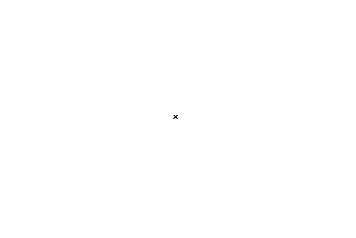

In [126]:
plottable_matches_w_contexts[11]
analyze_match(11, plottable_matches_w_contexts)

In [127]:
plottable_matches_w_contexts[11]
plottable_matches_w_contexts[12]

('Ma3Ma6(Ma6(',
 'Ma3)Ma3',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(
Match:
	Ma3)Ma3)
Right context:
	Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


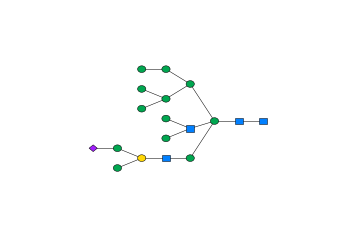

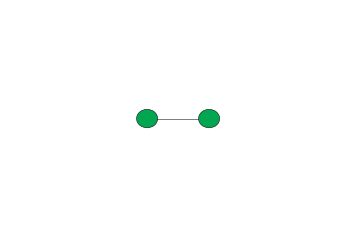

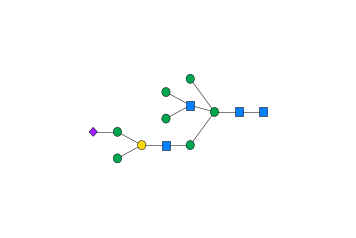

In [128]:
#this is dumb
plottable_matches_w_contexts[12]
analyze_match(12, plottable_matches_w_contexts)

In [129]:
plottable_matches_w_contexts[12]
plottable_matches_w_contexts[13]

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(
Match:
	Ma3)Ma3)Ma6
Right context:
	(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


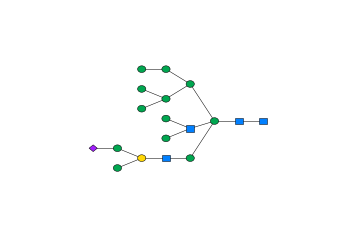

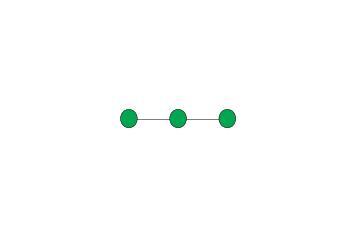

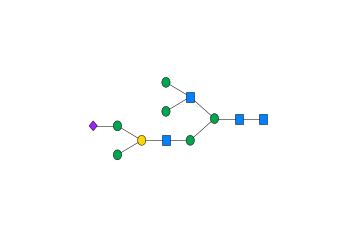

In [130]:
#this is INTERESTING 
# - the match is a node s.t. 
# - the left context describes a set of subtrees whose roots are all children
#   of the match's lowest 
plottable_matches_w_contexts[13]
analyze_match(13, plottable_matches_w_contexts)

In [131]:
plottable_matches_w_contexts[13]
plottable_matches_w_contexts[14]

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(
Match:
	Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4
Right context:
	GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


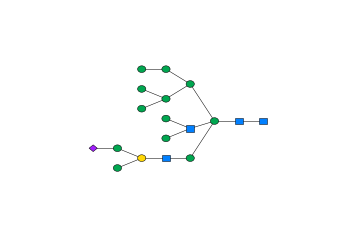

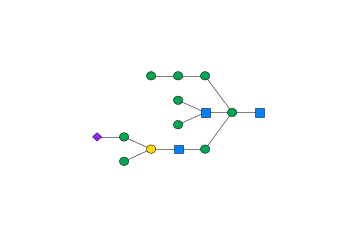

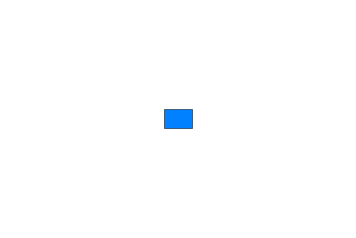

In [132]:
plottable_matches_w_contexts[15]
analyze_match(15, plottable_matches_w_contexts)

In [133]:
plottable_matches_w_contexts[15]
plottable_matches_w_contexts[16]
plottable_matches_w_contexts[17]
plottable_matches_w_contexts[18]
plottable_matches_w_contexts[19]

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

('Ma3Ma6(Ma6(',
 'Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '')

('Ma3Ma6(Ma6(Ma3',
 ')',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3',
 ')Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(Ma3
Match:
	)Ma3
Right context:
	)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


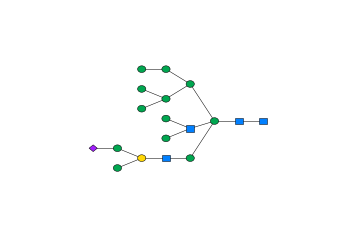

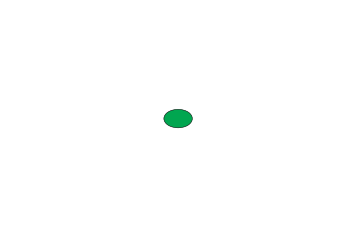

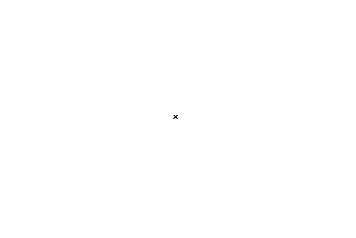

In [134]:
plottable_matches_w_contexts[18]
analyze_match(18, plottable_matches_w_contexts)

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(Ma3
Match:
	)Ma3)
Right context:
	Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


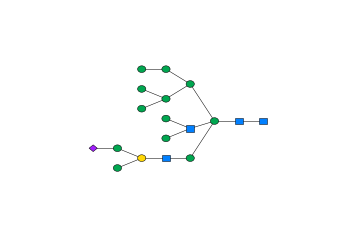

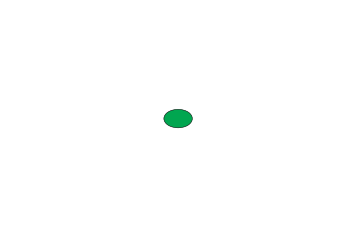

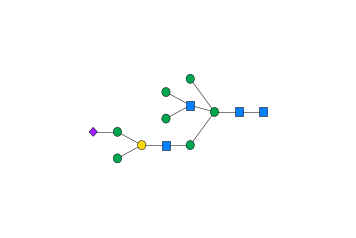

In [135]:
plottable_matches_w_contexts[19]
analyze_match(19, plottable_matches_w_contexts)

In [136]:
plottable_matches_w_contexts[19]
plottable_matches_w_contexts[20]
plottable_matches_w_contexts[21]
plottable_matches_w_contexts[22]
plottable_matches_w_contexts[23]
plottable_matches_w_contexts[24]

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

('Ma3Ma6(Ma6(Ma3',
 ')Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(Ma3)
Match:
	Ma3)
Right context:
	Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


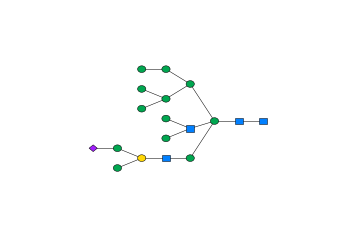

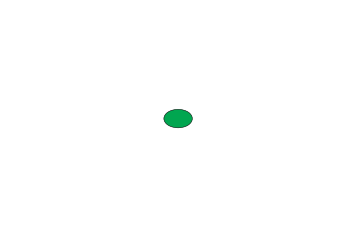

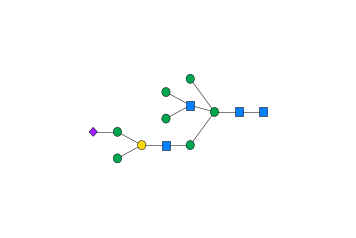

In [137]:
plottable_matches_w_contexts[24]
analyze_match(24, plottable_matches_w_contexts)

In [138]:
plottable_matches_w_contexts[24]
plottable_matches_w_contexts[25]

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

Whole tree:
	Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Left context:
	Ma3Ma6(Ma6(Ma3)
Match:
	Ma3)Ma6
Right context:
	(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


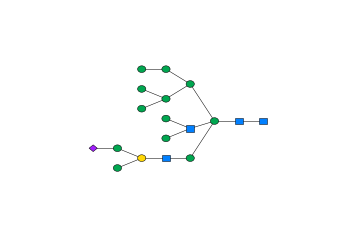

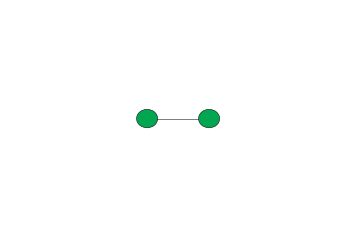

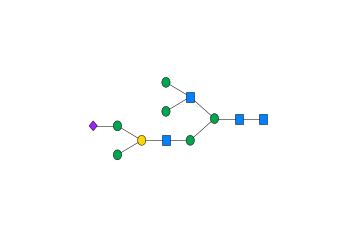

In [139]:
analyze_match(25, plottable_matches_w_contexts)

In [140]:
plottable_matches_w_contexts[25]
plottable_matches_w_contexts[26]
plottable_matches_w_contexts[27]
plottable_matches_w_contexts[28]
plottable_matches_w_contexts[29]

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)Ma6',
 '(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4',
 'GNb4GN')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4',
 'GN')

('Ma3Ma6(Ma6(Ma3)',
 'Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN',
 '')

('Ma3Ma6(Ma6(Ma3)Ma3',
 ')',
 'Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN')

## Krambeck et al. 2009's `possible branch point` " | " uncertainty operator

`...` is supposed to match "Empty string or `(...)`" (Table 7)

In [141]:
def is_possible_branch_point_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for) either `` or `(...)`.
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    left_edge_is_left_paren = s[0] == '('
    right_edge_is_right_paren = s[-1] == ')'
    center_matches_ligand = is_ligand_match(s[1:-1])
    return all([left_edge_is_left_paren, 
                right_edge_is_right_paren, 
                center_matches_ligand])

In [142]:
def get_possible_branch_point_matches(linear_code_expression, 
                                      as_generator=False, 
                                      with_contexts=False):
    '''
    Returns the nonempty substrings within `linear_code_expression` that match 
    Krambeck et al's `possible branch point` uncertainty operator `...`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_possible_branch_point_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_possible_branch_point_match, subsequences))

'Ma3Ma6(Ma6(Ma3)Ma3)Ma6(Mb4(Ma3)GNb4)(NNa6Ma6(Ma3)Ab4GNb2Ma3)Mb4GNb4GN'

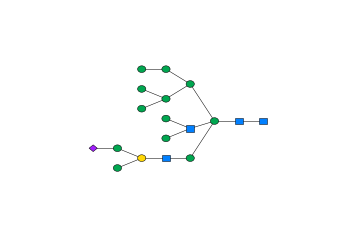

In [143]:
my_tree
parsePlot(my_tree)

In [144]:
my_possible_branch_point_matches, my_possible_branch_point_nonmatches = split(is_possible_branch_point_match, 
                                                                              generate_subsequences(tokenizer(my_tree)))

len(my_possible_branch_point_matches), len(my_possible_branch_point_nonmatches)

(6, 459)

In [145]:
my_possible_branch_point_matches

[['(', 'Ma6', '(', 'Ma3', ')', 'Ma3', ')'],
 ['(', 'Ma3', ')'],
 ['(', 'Mb4', '(', 'Ma3', ')', 'GNb4', ')'],
 ['(', 'Ma3', ')'],
 ['(', 'NNa6', 'Ma6', '(', 'Ma3', ')', 'Ab4', 'GNb2', 'Ma3', ')'],
 ['(', 'Ma3', ')']]

In [146]:
my_possible_branch_point_matches_lces = tuple(map(partial(str_join, ''),
                                                  my_possible_branch_point_matches))
my_possible_branch_point_matches_lces

('(Ma6(Ma3)Ma3)',
 '(Ma3)',
 '(Mb4(Ma3)GNb4)',
 '(Ma3)',
 '(NNa6Ma6(Ma3)Ab4GNb2Ma3)',
 '(Ma3)')

As you might expect from their definitions, every expression that matches the possible branch point operator also matches the ligand or continuation uncertainty operators, but the reverse is certainly not the case.

In [147]:
for each in my_possible_branch_point_matches_lces:
    print("{0} | {1}".format(each, each in ligand_unplottables))
    print("{0} | {1}".format(each, each in continuation_unplottables))

(Ma6(Ma3)Ma3) | True
(Ma6(Ma3)Ma3) | True
(Ma3) | True
(Ma3) | True
(Mb4(Ma3)GNb4) | True
(Mb4(Ma3)GNb4) | True
(Ma3) | True
(Ma3) | True
(NNa6Ma6(Ma3)Ab4GNb2Ma3) | True
(NNa6Ma6(Ma3)Ab4GNb2Ma3) | True
(Ma3) | True
(Ma3) | True
